# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏

Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏùÄ ECOS Í≤ΩÏ†úÏßÄÌëúÏôÄ DART Ïû¨Î¨¥Îç∞Ïù¥ÌÑ∞Î•º Í∞ÅÍ∞Å ÎèÖÎ¶ΩÏ†ÅÏúºÎ°ú Ï†ÑÏ≤òÎ¶¨Ìï©ÎãàÎã§.

## Ï≤òÎ¶¨ Í∞úÏöî

1. **ECOS Í≤ΩÏ†úÏßÄÌëú**: ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ (2010ÎÖÑÎ∂ÄÌÑ∞)
2. **DART Ïû¨Î¨¥Îç∞Ïù¥ÌÑ∞**: Î∂ÑÍ∏∞Î≥Ñ Ïû¨Î¨¥Ï†úÌëú Ï≤òÎ¶¨ (2015 Q4Î∂ÄÌÑ∞)

Í∞Å ÏÑπÏÖòÏùÄ ÎèÖÎ¶ΩÏ†ÅÏúºÎ°ú Ïã§Ìñâ Í∞ÄÎä•ÌïòÎ©∞, ÏÑúÎ°ú Îã§Î•∏ Î™®Îç∏ÏóêÏÑú ÌôúÏö©Îê©ÎãàÎã§.

In [11]:
# Í≥µÌÜµ Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò (Ìïú Î≤àÎßå Ïã§Ìñâ)
%pip install pandas numpy matplotlib seaborn openpyxl scikit-learn python-dotenv pymysql

Note: you may need to restart the kernel to use updated packages.


In [39]:
# Í≥µÌÜµ ÏÑ§Ï†ï (ÌïúÍ∏Ä Ìè∞Ìä∏, Í≤ΩÍ≥† Î¨¥Ïãú)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [40]:
# ECOS Í≤ΩÏ†úÎç∞Ïù¥ÌÑ∞ Î°úÎìú
try:
    # Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞
    if DatabaseConnection is None:
        raise Exception("Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Î™®ÎìàÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")
    
    db = DatabaseConnection()
    if not db.connect():
        raise Exception("Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞Ïóê Ïã§Ìå®ÌñàÏäµÎãàÎã§.")
    
    print("Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞ ÏÑ±Í≥µ!")
    
    # ECOS Îç∞Ïù¥ÌÑ∞ Ï°∞Ìöå
    ecos_data = db.get_ecos_data()
    
    if ecos_data is not None and not ecos_data.empty:
        print(f"ECOS Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å: {ecos_data.shape}")
        print(f"Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ: {ecos_data['date'].min()} ~ {ecos_data['date'].max()}")
        
        # Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞
        print("\nECOS Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞:")
        print(ecos_data.head())
        
        # Ïª¨Îüº Ï†ïÎ≥¥
        print(f"\nÏª¨Îüº Î™©Î°ù ({len(ecos_data.columns)}Í∞ú):")
        for i, col in enumerate(ecos_data.columns, 1):
            print(f"  {i:2d}. {col}")
    else:
        print("ECOS Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌï† Ïàò ÏóÜÏäµÎãàÎã§.")
    
except Exception as e:
    print(f"ECOS Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
    print("CSV ÌååÏùºÏóêÏÑú Î°úÎìúÎ•º ÏãúÎèÑÌï©ÎãàÎã§...")
    
    # CSV ÌååÏùºÏóêÏÑú Î°úÎìú ÏãúÎèÑ
    try:
        ecos_data = pd.read_csv('../ecos/economic_data_merged.csv')
        print(f"CSVÏóêÏÑú ECOS Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å: {ecos_data.shape}")
    except Exception as csv_error:
        print(f"CSV ÌååÏùº Î°úÎìúÎèÑ Ïã§Ìå®: {csv_error}")
        ecos_data = None

MySQL Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞ ÏÑ±Í≥µ
Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞ ÏÑ±Í≥µ!
ECOS Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å: (189, 23)
Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ: 201001 ~ 202509

ECOS Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞:
   id    date base_rate  ccsi construction_bsi_actual  \
0   1  201001     2.000  94.0                    89.0   
1   2  201002     2.000  94.0                    89.0   
2   3  201003     2.000  94.0                    89.0   
3   4  201004     2.000  94.0                    94.0   
4   5  201005     2.000  93.0                    95.0   

  construction_bsi_forecast     cpi    esi exchange_usd_krw_close  \
0                      86.0  85.351  114.0                1138.77   
1                      90.0  85.523  117.3                1156.83   
2                      96.0  85.696  116.1                1136.11   
3                      94.0  86.041  117.5                1115.71   
4                      98.0  86.128  116.8                1168.41   

  housing_lease_price  ... leading_index m2_growth  \
0          

In [41]:
ecos_data.head()

id    date base_rate  ccsi construction_bsi_actual  \
0   1  201001     2.000  94.0                    89.0   
1   2  201002     2.000  94.0                    89.0   
2   3  201003     2.000  94.0                    89.0   
3   4  201004     2.000  94.0                    94.0   
4   5  201005     2.000  93.0                    95.0   

  construction_bsi_forecast     cpi    esi exchange_usd_krw_close  \
0                      86.0  85.351  114.0                1138.77   
1                      90.0  85.523  117.3                1156.83   
2                      96.0  85.696  116.1                1136.11   
3                      94.0  86.041  117.5                1115.71   
4                      98.0  86.128  116.8                1168.41   

  housing_lease_price  ... leading_index m2_growth  \
0              58.508  ...         102.6      0.30   
1              58.872  ...         102.4      1.26   
2              59.271  ...         102.1      0.93   
3              59.643  ...         101.9      0.91   
4              59.886  ...         102.0      0.39   

  market_rate_treasury_bond_10yr market_rate_treasury_bond_3yr  \
0                          5.350                         4.290   
1                          5.300                         4.190   
2                          4.920                         3.940   
3                          4.910                         3.770   
4                          4.950                         3.700   

  market_rate_corporate_bond_3yr_AA market_rate_corporate_bond_3yr_BBB  \
0                             5.400                             11.470   
1                             5.320                             11.390   
2                             5.020                             11.080   
3                             4.690                             10.750   
4                             4.480                             10.540   

  ppi_non_metal_mineral ppi_steel_primary          created_at  \
0                 79.42            100.31 2025-09-16 12:18:15   
1                 79.42            100.22 2025-09-16 12:18:15   
2                 79.42            100.84 2025-09-16 12:18:15   
3                 78.93            103.77 2025-09-16 12:18:15   
4                 78.93            112.46 2025-09-16 12:18:15   

           updated_at  
0 2025-09-16 12:28:05  
1 2025-09-16 12:18:15  
2 2025-09-16 12:18:15  
3 2025-09-16 12:18:15  
4 2025-09-16 12:18:15  

[5 rows x 23 columns]

In [42]:
# Ïª¨ÎüºÎ™Ö ÌôïÏù∏
print("=== ECOS Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº Î™©Î°ù ===")
print(ecos_data.columns.tolist())
print(f"\nÏ¥ù Ïª¨Îüº Í∞úÏàò: {len(ecos_data.columns)}")

# BSI Í¥ÄÎ†® Ïª¨Îüº Ï∞æÍ∏∞
bsi_columns = [col for col in ecos_data.columns if 'bsi' in col.lower()]
print(f"\n=== BSI Í¥ÄÎ†® Ïª¨Îüº ===")
print(bsi_columns)

=== ECOS Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº Î™©Î°ù ===
['id', 'date', 'base_rate', 'ccsi', 'construction_bsi_actual', 'construction_bsi_forecast', 'cpi', 'esi', 'exchange_usd_krw_close', 'housing_lease_price', 'housing_sale_price', 'import_price_non_metal_mineral', 'import_price_steel_primary', 'leading_index', 'm2_growth', 'market_rate_treasury_bond_10yr', 'market_rate_treasury_bond_3yr', 'market_rate_corporate_bond_3yr_AA', 'market_rate_corporate_bond_3yr_BBB', 'ppi_non_metal_mineral', 'ppi_steel_primary', 'created_at', 'updated_at']

Ï¥ù Ïª¨Îüº Í∞úÏàò: 23

=== BSI Í¥ÄÎ†® Ïª¨Îüº ===
['construction_bsi_actual', 'construction_bsi_forecast']


In [45]:
# Í≤ΩÏ†úÏßÄÌëú Ïª¨ÎüºÎì§ÏùÑ ÏàòÏπòÌòïÏúºÎ°ú Î≥ÄÌôò
numeric_column_names = [
    'base_rate', 'ccsi', 'construction_bsi_actual', 'construction_bsi_forecast', 
    'cpi', 'esi', 'exchange_usd_krw_close', 'housing_lease_price', 
    'housing_sale_price', 'import_price_non_metal_mineral', 'import_price_steel_primary', 
    'leading_index', 'm2_growth', 'market_rate_treasury_bond_10yr', 
    'market_rate_treasury_bond_3yr', 'market_rate_corporate_bond_3yr_AA', 
    'market_rate_corporate_bond_3yr_BBB', 'ppi_non_metal_mineral', 'ppi_steel_primary'
]

# Ïà´ÏûêÎ°ú Î≥ÄÌôò (ÏóêÎü¨Í∞Ä ÏûàÎäî Í∞íÏùÄ NaNÏúºÎ°ú Ï≤òÎ¶¨)
for col in numeric_column_names:
    if col in ecos_data.columns:
        ecos_data[col] = pd.to_numeric(ecos_data[col], errors='coerce')
        
print("=== Ïª¨Îüº Î≥ÄÌôò ÏôÑÎ£å ===")
print("Î≥ÄÌôòÎêú Ïª¨ÎüºÎì§Ïùò Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ:")
for col in numeric_column_names:
    if col in ecos_data.columns:
        print(f"{col}: {ecos_data[col].dtype}")
        
# Ïù¥Ï†ú ÏàòÏπòÌòï Ïª¨Îüº Îã§Ïãú ÌôïÏù∏
numeric_cols = ecos_data.select_dtypes(include=[np.number]).columns
print(f"\n=== Î≥ÄÌôò ÌõÑ ÏàòÏπòÌòï Ïª¨Îüº Í∞úÏàò ===")
print(f"Ï¥ù {len(numeric_cols)}Í∞ú Ïª¨Îüº: {numeric_cols.tolist()}")

=== Ïª¨Îüº Î≥ÄÌôò ÏôÑÎ£å ===
Î≥ÄÌôòÎêú Ïª¨ÎüºÎì§Ïùò Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ:
base_rate: float64
ccsi: float64
construction_bsi_actual: float64
construction_bsi_forecast: float64
cpi: float64
esi: float64
exchange_usd_krw_close: float64
housing_lease_price: float64
housing_sale_price: float64
import_price_non_metal_mineral: float64
import_price_steel_primary: float64
leading_index: float64
m2_growth: float64
market_rate_treasury_bond_10yr: float64
market_rate_treasury_bond_3yr: float64
market_rate_corporate_bond_3yr_AA: float64
market_rate_corporate_bond_3yr_BBB: float64
ppi_non_metal_mineral: float64
ppi_steel_primary: float64

=== Î≥ÄÌôò ÌõÑ ÏàòÏπòÌòï Ïª¨Îüº Í∞úÏàò ===
Ï¥ù 20Í∞ú Ïª¨Îüº: ['id', 'base_rate', 'ccsi', 'construction_bsi_actual', 'construction_bsi_forecast', 'cpi', 'esi', 'exchange_usd_krw_close', 'housing_lease_price', 'housing_sale_price', 'import_price_non_metal_mineral', 'import_price_steel_primary', 'leading_index', 'm2_growth', 'market_rate_treasury_bond_10yr', 'market_rate_

## ECOS ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî

Ï£ºÏöî Í≤ΩÏ†úÏßÄÌëúÎì§Ïùò ÏãúÍ≥ÑÏó¥ Î≥ÄÌôîÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.

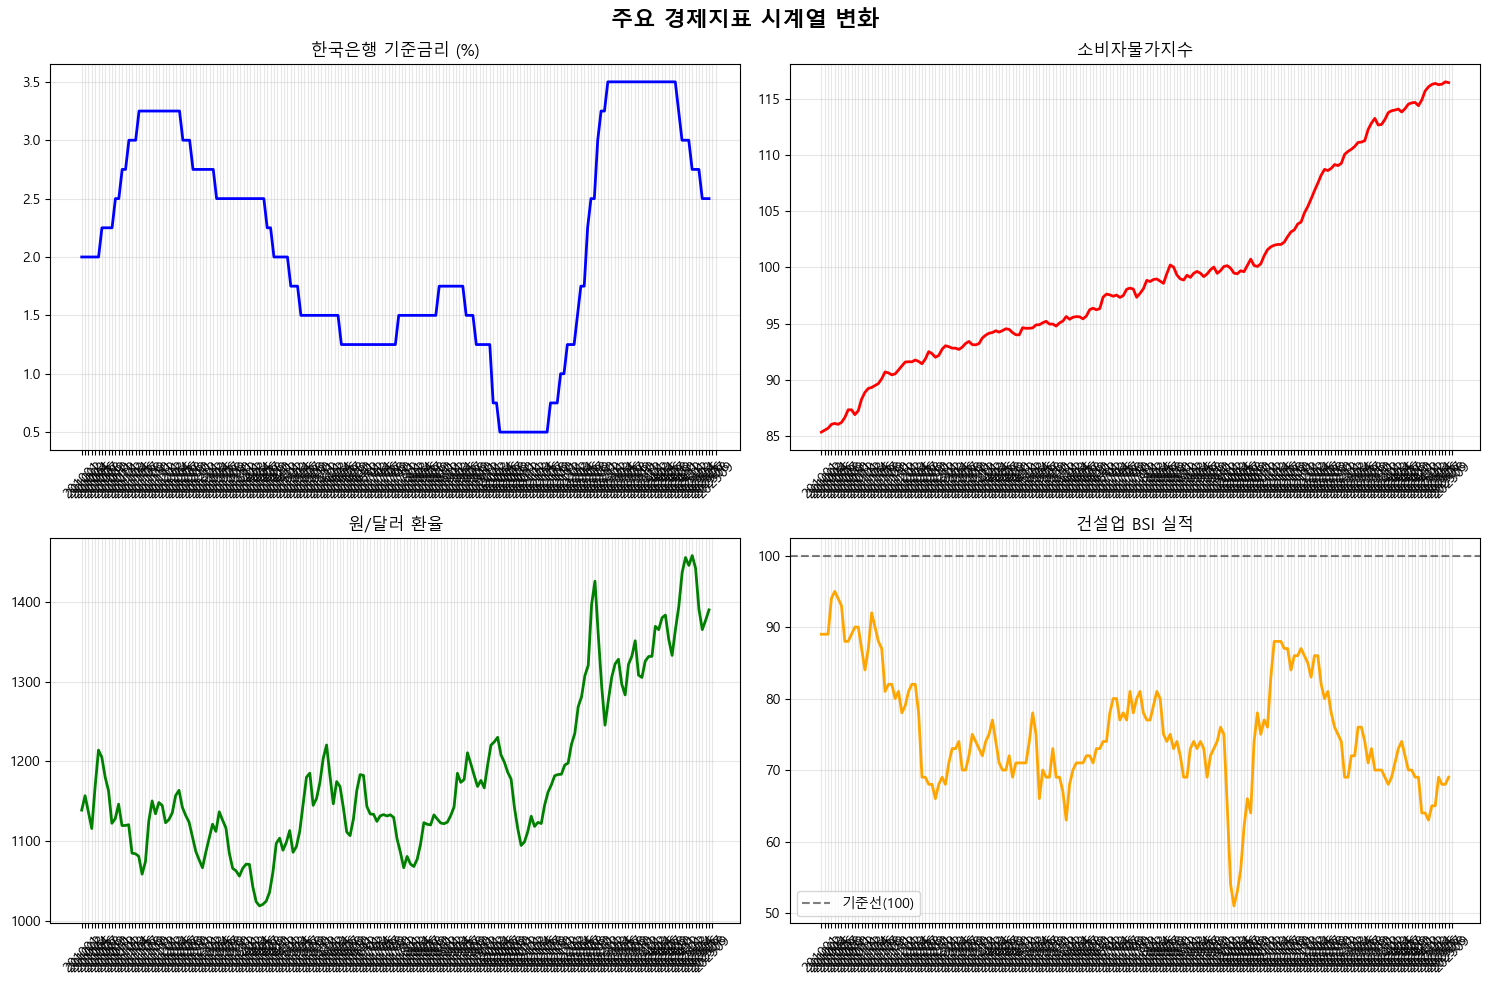

In [46]:
# 1. Ï£ºÏöî Í≤ΩÏ†úÏßÄÌëú ÏãúÍ≥ÑÏó¥ Í∑∏ÎûòÌîÑ
if 'ecos_data' in locals():
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Ï£ºÏöî Í≤ΩÏ†úÏßÄÌëú ÏãúÍ≥ÑÏó¥ Î≥ÄÌôî', fontsize=16, fontweight='bold')
    
    # 1) Í∏∞Ï§ÄÍ∏àÎ¶¨
    axes[0, 0].plot(ecos_data['date'], ecos_data['base_rate'], color='blue', linewidth=2)
    axes[0, 0].set_title('ÌïúÍµ≠ÏùÄÌñâ Í∏∞Ï§ÄÍ∏àÎ¶¨ (%)')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2) ÏÜåÎπÑÏûêÎ¨ºÍ∞ÄÏßÄÏàò
    axes[0, 1].plot(ecos_data['date'], ecos_data['cpi'], color='red', linewidth=2)
    axes[0, 1].set_title('ÏÜåÎπÑÏûêÎ¨ºÍ∞ÄÏßÄÏàò')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # 3) ÏõêÎã¨Îü¨ ÌôòÏú®
    axes[1, 0].plot(ecos_data['date'], ecos_data['exchange_usd_krw_close'], color='green', linewidth=2)
    axes[1, 0].set_title('Ïõê/Îã¨Îü¨ ÌôòÏú®')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # 4) Í±¥ÏÑ§ÏóÖ BSI Ïã§Ï†Å
    axes[1, 1].plot(ecos_data['date'], ecos_data['construction_bsi_actual'], color='orange', linewidth=2)
    axes[1, 1].set_title('Í±¥ÏÑ§ÏóÖ BSI Ïã§Ï†Å')
    axes[1, 1].axhline(y=100, color='black', linestyle='--', alpha=0.5, label='Í∏∞Ï§ÄÏÑ†(100)')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()
else:
    print("ECOS Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§. Ïù¥Ï†Ñ ÏÖÄÏùÑ Î®ºÏ†Ä Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.")

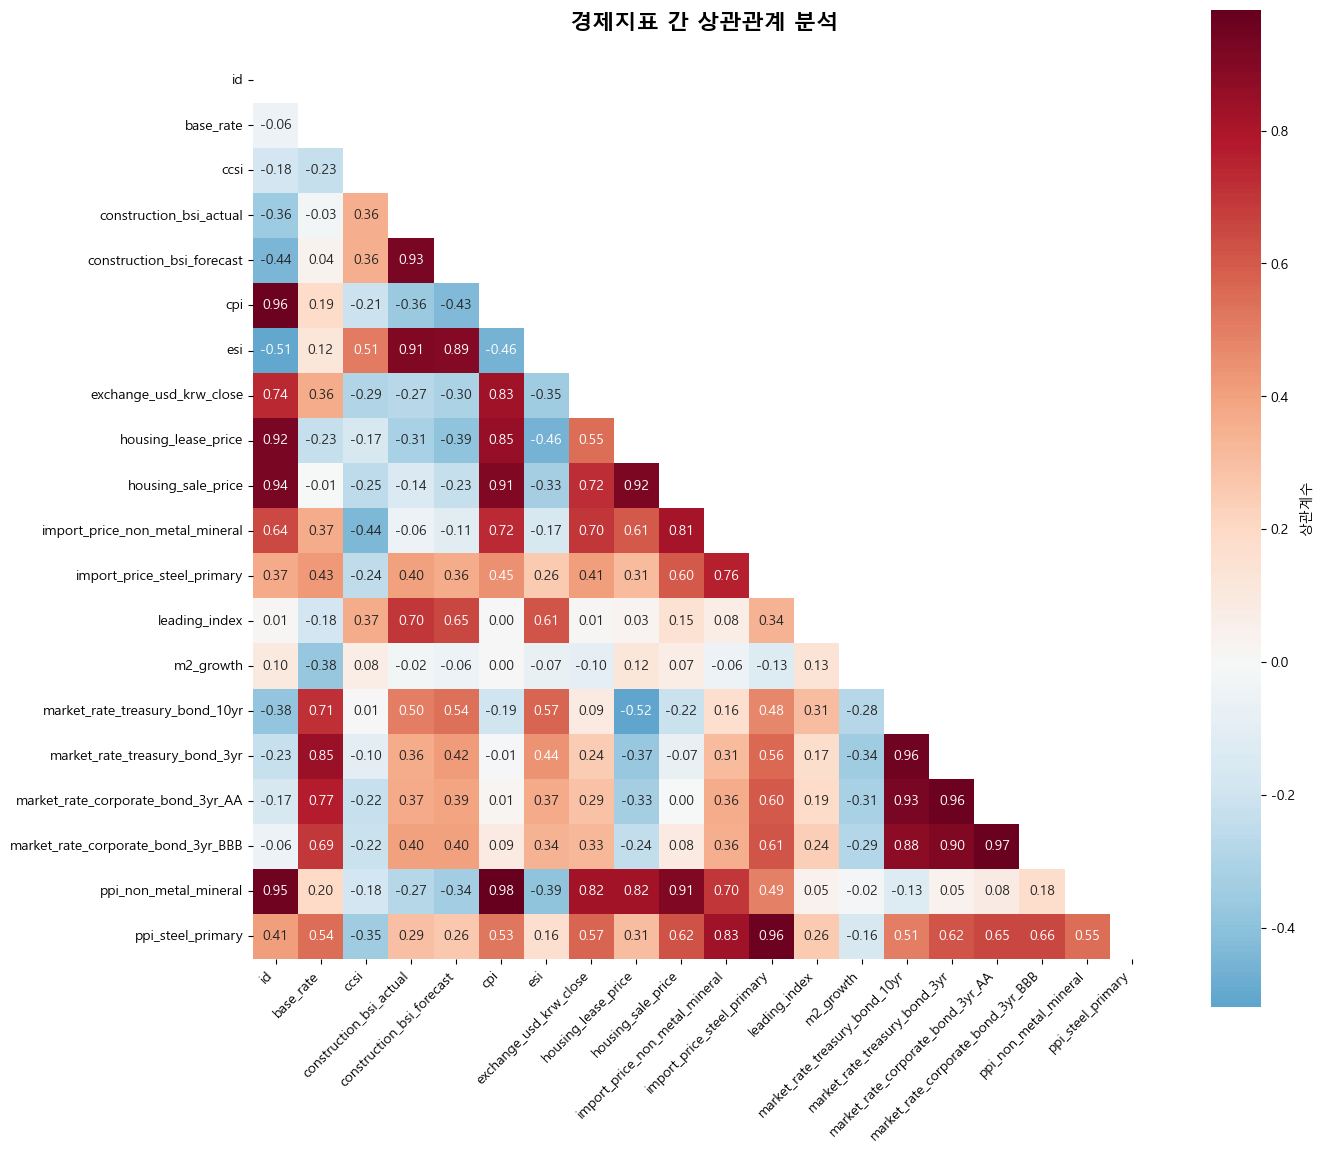

=== Í±¥ÏÑ§ÏóÖ BSI Ïã§Ï†ÅÍ≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ===
construction_bsi_actual               1.000000
construction_bsi_forecast             0.932074
esi                                   0.905431
leading_index                         0.699616
market_rate_treasury_bond_10yr        0.497952
import_price_steel_primary            0.401252
market_rate_corporate_bond_3yr_BBB    0.400306
market_rate_corporate_bond_3yr_AA     0.371168
cpi                                   0.363448
market_rate_treasury_bond_3yr         0.362326
Name: construction_bsi_actual, dtype: float64


In [47]:
# 2. Í≤ΩÏ†úÏßÄÌëú Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
if 'ecos_data' in locals():
    # ÏàòÏπòÌòï Ïª¨ÎüºÎßå ÏÑ†ÌÉù (ÎÇ†Ïßú Ï†úÏô∏)
    numeric_cols = ecos_data.select_dtypes(include=[np.number]).columns
    correlation_matrix = ecos_data[numeric_cols].corr()
    
    plt.figure(figsize=(14, 12))
    
    # ÌûàÌä∏Îßµ ÏÉùÏÑ±
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # ÏÉÅÏÇºÍ∞Å ÎßàÏä§ÌÅ¨
    sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdBu_r', 
                center=0,
                square=True,
                fmt='.2f',
                cbar_kws={'label': 'ÏÉÅÍ¥ÄÍ≥ÑÏàò'})
    
    plt.title('Í≤ΩÏ†úÏßÄÌëú Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù', fontsize=16, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Í±¥ÏÑ§ÏóÖ BSIÏôÄ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÑ ÏßÄÌëúÎì§
    print("=== Í±¥ÏÑ§ÏóÖ BSI Ïã§Ï†ÅÍ≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ===")
    bsi_corr = correlation_matrix['construction_bsi_actual'].abs().sort_values(ascending=False)
    print(bsi_corr.head(10))

In [48]:
# ECOS ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è Ï†ïÎ¶¨
print("=== ECOS ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ ===")

# 1. ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨ Î∞è ÎÇ†Ïßú Ï≤òÎ¶¨
ecos_monthly = ecos_data.copy()

# ÎÇ†Ïßú Ïª¨ÎüºÏùÑ YYYY-MM ÌòïÏãùÏúºÎ°ú Ï≤òÎ¶¨
if ecos_monthly['date'].dtype == 'object' or ecos_monthly['date'].dtype == 'int64':
    # YYYYMM ÌòïÏãùÏùÑ YYYY-MM Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
    ecos_monthly['date'] = ecos_monthly['date'].astype(str).str[:4] + '-' + ecos_monthly['date'].astype(str).str[4:6]
else:
    # datetime ÌòïÏãùÏù∏ Í≤ΩÏö∞ YYYY-MM Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
    ecos_monthly['date'] = ecos_monthly['date'].dt.strftime('%Y-%m')

ecos_monthly = ecos_monthly.sort_values('date').reset_index(drop=True)

# ÌòÑÏû¨ Îã¨ Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞ (2025-09)
current_month = "2025-09"
print(f"ÌòÑÏû¨ Îã¨ Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞: {current_month}")
initial_count = len(ecos_monthly)
ecos_monthly = ecos_monthly[ecos_monthly['date'] != current_month].reset_index(drop=True)
removed_count = initial_count - len(ecos_monthly)
print(f"Ï†úÍ±∞Îêú Îç∞Ïù¥ÌÑ∞: {removed_count}Í∞ú")

print(f"ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ: {ecos_monthly['date'].min()} ~ {ecos_monthly['date'].max()}")
print(f"ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {len(ecos_monthly)}Í∞ú")

# 2. ÏõîÍ∞Ñ ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±
print("\n=== ÏõîÍ∞Ñ ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ± ===")

# 2-1. CPI MoM (Month over Month) Î≥ÄÌôîÏú®
ecos_monthly['cpi_mom'] = ecos_monthly['cpi'].pct_change() * 100  # Î∞±Î∂ÑÏú®Î°ú Î≥ÄÌôò

# 2-2. Í∏∞Ï§ÄÍ∏àÎ¶¨ ÏõîÎ≥Ñ Î≥ÄÌôîÌè≠ (bp, basis points)
ecos_monthly['base_rate_mdiff_bp'] = ecos_monthly['base_rate'].diff() * 100  # bpÎ°ú Î≥ÄÌôò

# 2-3. Term Spread (10Y - 3Y Íµ≠Í≥†Ï±Ñ Í∏àÎ¶¨Ï∞®)
ecos_monthly['term_spread'] = ecos_monthly['market_rate_treasury_bond_10yr'] - ecos_monthly['market_rate_treasury_bond_3yr']

# 2-4. Credit Spread (BBB - AA ÌöåÏÇ¨Ï±Ñ Í∏àÎ¶¨Ï∞®)
ecos_monthly['credit_spread'] = ecos_monthly['market_rate_corporate_bond_3yr_BBB'] - ecos_monthly['market_rate_corporate_bond_3yr_AA']

# 2-5. ÌôòÏú® 3Í∞úÏõî Ïù¥ÎèôÌèâÍ∑†
ecos_monthly['exchange_ma3'] = ecos_monthly['exchange_usd_krw_close'].rolling(window=3, min_periods=1).mean()

# 2-6. ÌôòÏú® Ï†ÑÏõî ÎåÄÎπÑ Î≥ÄÌôîÏú®
ecos_monthly['exchange_mom'] = ecos_monthly['exchange_usd_krw_close'].pct_change() * 100

# 2-7. Í±¥ÏÑ§ÏóÖ BSI 3Í∞úÏõî Ïù¥ÎèôÌèâÍ∑†
ecos_monthly['construction_bsi_ma3'] = ecos_monthly['construction_bsi_actual'].rolling(window=3, min_periods=1).mean()

# 2-8. Í±¥ÏÑ§ÏóÖ BSI Ï†ÑÏõî ÎåÄÎπÑ Î≥ÄÌôî
ecos_monthly['construction_bsi_mom'] = ecos_monthly['construction_bsi_actual'].diff()

# 3. Ï≤´ Î≤àÏß∏ ÌñâÏùò NaN Ï†úÍ±∞ (Î≥ÄÌôîÏú® Í≥ÑÏÇ∞ÏúºÎ°ú Ïù∏Ìïú)
print(f"ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ± Ï†Ñ: {len(ecos_monthly)}Í∞ú")
ecos_monthly = ecos_monthly.dropna(subset=['cpi_mom']).reset_index(drop=True)
print(f"ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ± ÌõÑ: {len(ecos_monthly)}Í∞ú")

# 4. Ïª¨Îüº ÏàúÏÑú Ï†ïÎ¶¨
# ÏãúÍ∞Ñ Í¥ÄÎ†® Ïª¨Îüº
time_cols = ['date']

# Î™®Îì† ÌååÏÉùÎ≥ÄÏàò Î¶¨Ïä§Ìä∏
monthly_derived_vars = ['cpi_mom', 'base_rate_mdiff_bp', 'term_spread', 'credit_spread', 
                       'exchange_ma3', 'exchange_mom', 'construction_bsi_ma3', 'construction_bsi_mom']

# ÏõêÎ≥∏ Í≤ΩÏ†úÏßÄÌëú Ïª¨ÎüºÎì§ (ÌååÏÉùÎ≥ÄÏàòÏôÄ ÏãúÍ∞Ñ Ïª¨Îüº, id Ï†úÏô∏)
original_cols = [col for col in ecos_monthly.columns 
                if col not in time_cols + monthly_derived_vars + ['id', 'created_at', 'updated_at']]

# Ïª¨Îüº ÏàúÏÑú: ÏßÄÌëúÏôÄ Í¥ÄÎ†® ÌååÏÉùÎ≥ÄÏàòÎ•º Í∑∏Î£πÏúºÎ°ú Î∞∞Ïπò
column_order = time_cols.copy()

# Í∏∞Ï§ÄÍ∏àÎ¶¨ Í∑∏Î£π
if 'base_rate' in original_cols:
    column_order.append('base_rate')
    if 'base_rate_mdiff_bp' in ecos_monthly.columns:
        column_order.append('base_rate_mdiff_bp')
    original_cols.remove('base_rate')

# CPI Í∑∏Î£π  
if 'cpi' in original_cols:
    column_order.append('cpi')
    if 'cpi_mom' in ecos_monthly.columns:
        column_order.append('cpi_mom')
    original_cols.remove('cpi')

# Í±¥ÏÑ§ÏóÖ BSI Í∑∏Î£π
if 'construction_bsi_actual' in original_cols:
    column_order.append('construction_bsi_actual')
    if 'construction_bsi_ma3' in ecos_monthly.columns:
        column_order.append('construction_bsi_ma3')
    if 'construction_bsi_mom' in ecos_monthly.columns:
        column_order.append('construction_bsi_mom')
    original_cols.remove('construction_bsi_actual')

# ÌôòÏú® Í∑∏Î£π
if 'exchange_usd_krw_close' in original_cols:
    column_order.append('exchange_usd_krw_close')
    if 'exchange_mom' in ecos_monthly.columns:
        column_order.append('exchange_mom')
    if 'exchange_ma3' in ecos_monthly.columns:
        column_order.append('exchange_ma3')
    original_cols.remove('exchange_usd_krw_close')

# Íµ≠Í≥†Ï±Ñ Í∑∏Î£π
if 'market_rate_treasury_bond_3yr' in original_cols:
    column_order.append('market_rate_treasury_bond_3yr')
    original_cols.remove('market_rate_treasury_bond_3yr')

if 'market_rate_treasury_bond_10yr' in original_cols:
    column_order.append('market_rate_treasury_bond_10yr')
    original_cols.remove('market_rate_treasury_bond_10yr')

# Term Spread
if 'term_spread' in ecos_monthly.columns:
    column_order.append('term_spread')

# ÌöåÏÇ¨Ï±Ñ Í∑∏Î£π
if 'market_rate_corporate_bond_3yr_AA' in original_cols:
    column_order.append('market_rate_corporate_bond_3yr_AA')
    original_cols.remove('market_rate_corporate_bond_3yr_AA')

if 'market_rate_corporate_bond_3yr_BBB' in original_cols:
    column_order.append('market_rate_corporate_bond_3yr_BBB')
    original_cols.remove('market_rate_corporate_bond_3yr_BBB')

# Credit Spread
if 'credit_spread' in ecos_monthly.columns:
    column_order.append('credit_spread')

# ÎÇòÎ®∏ÏßÄ ÏõêÎ≥∏ Í≤ΩÏ†úÏßÄÌëúÎì§ (ÏïåÌååÎ≤≥ ÏàúÏÑú)
remaining_cols = sorted(original_cols)
column_order.extend(remaining_cols)

# Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî Ïª¨ÎüºÎßå ÏÑ†ÌÉù
final_columns = [col for col in column_order if col in ecos_monthly.columns]
ecos_monthly = ecos_monthly[final_columns]

print("\n=== ÏõîÍ∞Ñ ÌååÏÉùÎ≥ÄÏàò ÏöîÏïΩ ÌÜµÍ≥Ñ ===")
print(ecos_monthly[monthly_derived_vars].describe().round(2))

print(f"\n=== ÏµúÏ¢Ö ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº ===")
print(f"Ï¥ù Ïª¨Îüº Ïàò: {len(ecos_monthly.columns)}")
print("Ïª¨Îüº Î™©Î°ù:")
for i, col in enumerate(ecos_monthly.columns):
    print(f"  {i+1}. {col}")

print("\n=== ÏµúÍ∑º 5Í∞úÏõî Îç∞Ïù¥ÌÑ∞ ===")
recent_monthly_cols = ['date', 'construction_bsi_actual', 'construction_bsi_ma3', 'cpi_mom', 'base_rate_mdiff_bp', 'exchange_mom']
print(ecos_monthly[recent_monthly_cols].tail())

=== ECOS ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ ===
ÌòÑÏû¨ Îã¨ Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞: 2025-09
Ï†úÍ±∞Îêú Îç∞Ïù¥ÌÑ∞: 1Í∞ú
ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ: 2010-01 ~ 2025-08
ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 188Í∞ú

=== ÏõîÍ∞Ñ ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ± ===
ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ± Ï†Ñ: 188Í∞ú
ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ± ÌõÑ: 187Í∞ú

=== ÏõîÍ∞Ñ ÌååÏÉùÎ≥ÄÏàò ÏöîÏïΩ ÌÜµÍ≥Ñ ===
       cpi_mom  base_rate_mdiff_bp  term_spread  credit_spread  exchange_ma3  \
count   187.00              186.00       187.00         187.00        187.00   
mean      0.17                0.27         0.42           6.00       1177.04   
std       0.33               11.91         0.27           0.25         99.98   
min      -0.74              -50.00        -0.09           5.38       1021.10   
25%      -0.07                0.00         0.22           5.83       1114.71   
50%       0.17                0.00         0.40           6.04       1143.90   
75%       0.38                0.00         0.56           6.21       1200.90   
max       1.19               50.00        

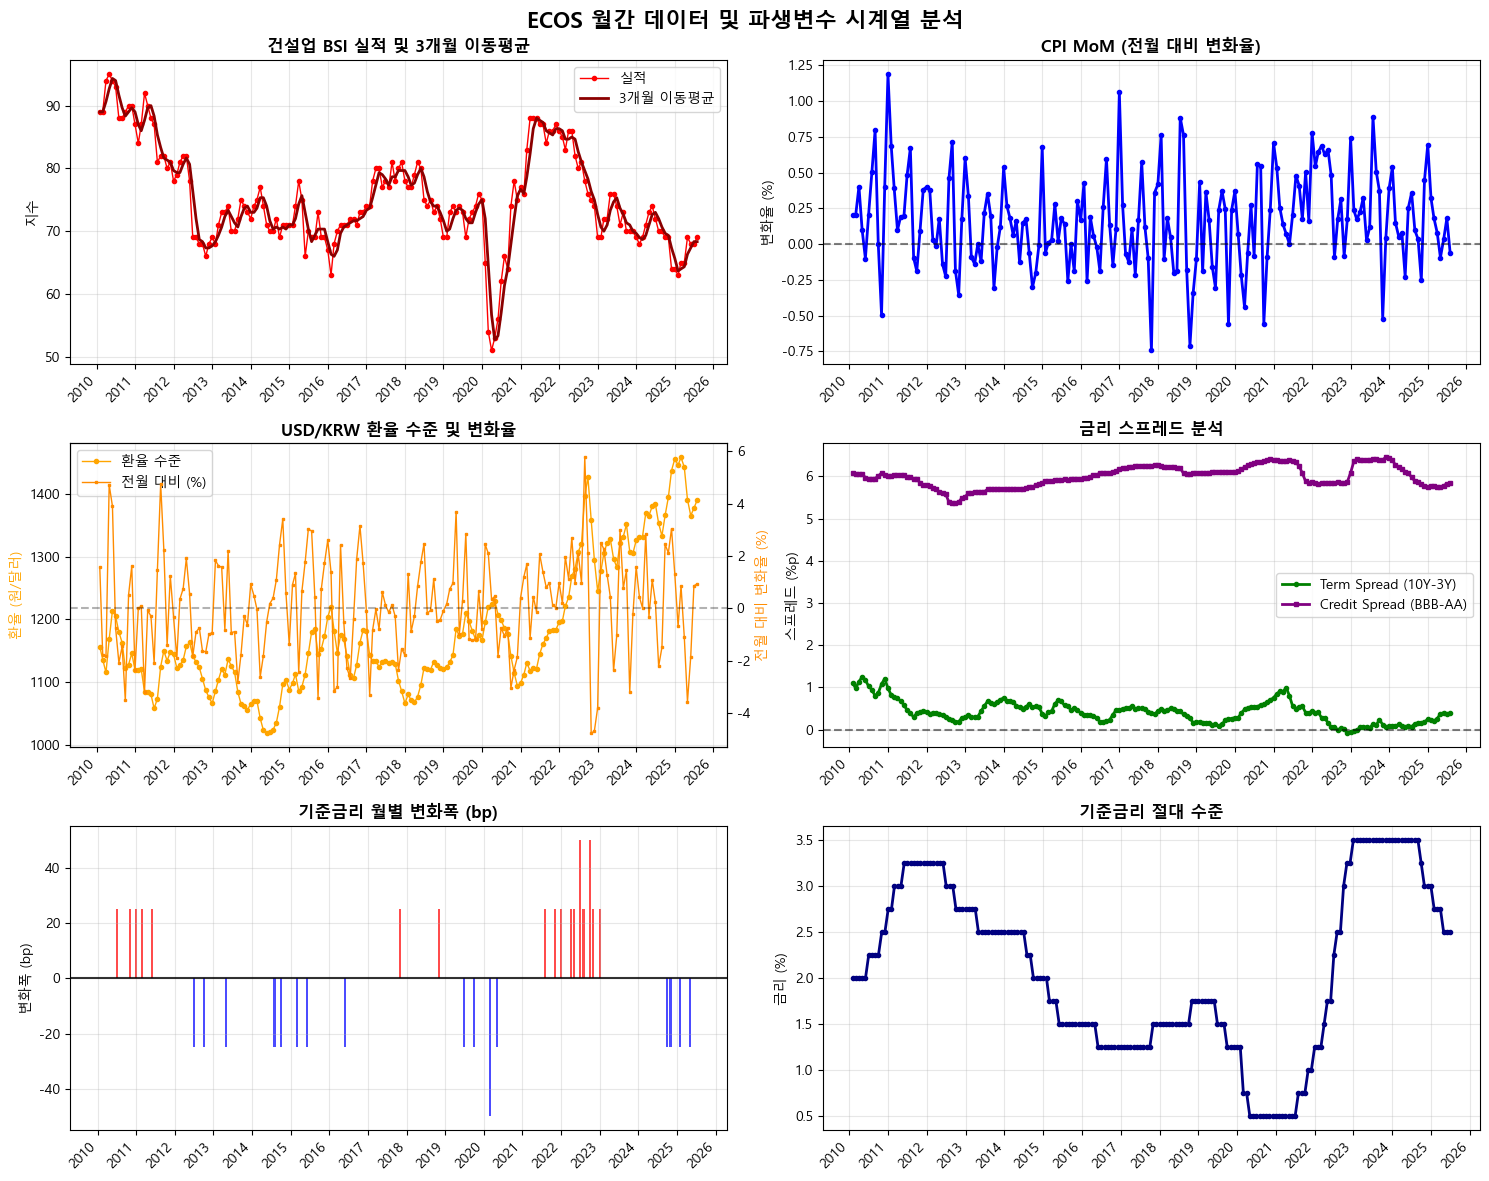


=== ÏõîÍ∞Ñ ÌååÏÉùÎ≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ===
                      cpi_mom  base_rate_mdiff_bp  term_spread  credit_spread  \
cpi_mom                 1.000               0.206        0.052          0.035   
base_rate_mdiff_bp      0.206               1.000        0.024          0.065   
term_spread             0.052               0.024        1.000          0.016   
credit_spread           0.035               0.065        0.016          1.000   
exchange_ma3            0.063               0.054       -0.513          0.146   
exchange_mom            0.043              -0.024       -0.024          0.021   
construction_bsi_ma3    0.209               0.386        0.480          0.055   
construction_bsi_mom   -0.136               0.105        0.116          0.127   

                      exchange_ma3  exchange_mom  construction_bsi_ma3  \
cpi_mom                      0.063         0.043                 0.209   
base_rate_mdiff_bp           0.054        -0.024                 0.386   
te

In [50]:
ecos_monthly

date  base_rate  base_rate_mdiff_bp      cpi   cpi_mom  \
0    2010-02       2.00                 0.0   85.523  0.201521   
1    2010-03       2.00                 0.0   85.696  0.202285   
2    2010-04       2.00                 0.0   86.041  0.402586   
3    2010-05       2.00                 0.0   86.128  0.101115   
4    2010-06       2.00                 0.0   86.041 -0.101012   
..       ...        ...                 ...      ...       ...   
182  2025-04       2.75                 0.0  116.380  0.077393   
183  2025-05       2.50               -25.0  116.270 -0.094518   
184  2025-06       2.50                 0.0  116.310  0.034403   
185  2025-07       2.50                 0.0  116.520  0.180552   
186  2025-08        NaN                 NaN  116.450 -0.060076   

     construction_bsi_actual  construction_bsi_ma3  construction_bsi_mom  \
0                       89.0             89.000000                   0.0   
1                       89.0             89.000000                   0.0   
2                       94.0             90.666667                   5.0   
3                       95.0             92.666667                   1.0   
4                       94.0             94.333333                  -1.0   
..                       ...                   ...                   ...   
182                     65.0             64.333333                   0.0   
183                     69.0             66.333333                   4.0   
184                     68.0             67.333333                  -1.0   
185                     68.0             68.333333                   0.0   
186                     69.0             68.333333                   1.0   

     exchange_usd_krw_close  exchange_mom  ...  construction_bsi_forecast  \
0                   1156.83      1.585922  ...                       90.0   
1                   1136.11     -1.791102  ...                       96.0   
2                   1115.71     -1.795601  ...                       94.0   
3                   1168.41      4.723450  ...                       98.0   
4                   1214.02      3.903595  ...                       95.0   
..                      ...           ...  ...                        ...   
182                 1441.92     -1.097454  ...                       65.0   
183                 1390.70     -3.552208  ...                       65.0   
184                 1365.15     -1.837204  ...                       69.0   
185                 1376.92      0.862176  ...                       68.0   
186                 1389.86      0.939779  ...                       67.0   

       esi  housing_lease_price  housing_sale_price  \
0    117.3               58.872              65.040   
1    116.1               59.271              65.201   
2    117.5               59.643              65.327   
3    116.8               59.886              65.358   
4    115.5               60.123              65.365   
..     ...                  ...                 ...   
182   87.5               93.371              92.994   
183   92.2               93.414              93.038   
184   92.8               93.483              93.164   
185   92.9               93.555              93.317   
186   94.6               93.598              93.357   

     import_price_non_metal_mineral  import_price_steel_primary  \
0                             73.47                      104.28   
1                             73.47                      108.21   
2                             73.47                      116.42   
3                             78.92                      116.76   
4                             74.12                      114.22   
..                              ...                         ...   
182                          146.60                      119.97   
183                          146.60                      119.42   
184                          143.66                      118.61   
185                          143.66           

In [53]:
# ECOS ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Î∞è Î≥¥Í∞Ñ
print("=== ECOS ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Ïπò Î∂ÑÏÑù Î∞è Î≥¥Í∞Ñ ===")

# 1. Í≤∞Ï∏°Ïπò ÌòÑÌô© Î∂ÑÏÑù
print("\n1. Í≤∞Ï∏°Ïπò ÌòÑÌô© Î∂ÑÏÑù")
missing_info = ecos_monthly.isnull().sum()
missing_info = missing_info[missing_info > 0].sort_values(ascending=False)

if len(missing_info) > 0:
    print(f"Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ïª¨Îüº: {len(missing_info)}Í∞ú")
    print("Í≤∞Ï∏°Ïπò Í∞úÏàò:")
    for col, count in missing_info.items():
        pct = (count / len(ecos_monthly)) * 100
        print(f"  {col}: {count}Í∞ú ({pct:.1f}%)")
    
    # 2. Í≤∞Ï∏°Ïπò Ìå®ÌÑ¥ Î∂ÑÏÑù
    print(f"\n2. Í≤∞Ï∏°Ïπò Ìå®ÌÑ¥ Î∂ÑÏÑù")
    
    # ÎÇ†ÏßúÎ≥Ñ Í≤∞Ï∏°Ïπò ÌòÑÌô©
    missing_by_date = ecos_monthly[missing_info.index].isnull().sum(axis=1)
    dates_with_missing = ecos_monthly[missing_by_date > 0]['date'].tolist()
    if dates_with_missing:
        print(f"Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÎÇ†Ïßú: {len(dates_with_missing)}Í∞ú")
        print(f"ÏµúÏ¥à Í≤∞Ï∏°Ïπò ÎÇ†Ïßú: {min(dates_with_missing)}")
        print(f"ÏµúÍ∑º Í≤∞Ï∏°Ïπò ÎÇ†Ïßú: {max(dates_with_missing)}")
    
    # 3. Í≤∞Ï∏°Ïπò Î≥¥Í∞Ñ
    print(f"\n3. Í≤∞Ï∏°Ïπò Î≥¥Í∞Ñ Ïã§Ìñâ")
    ecos_monthly_filled = ecos_monthly.copy()
    
    # ÏàòÏπòÌòï Ïª¨ÎüºÎßå ÏÑ†ÌÉù (date Ï†úÏô∏)
    numeric_cols_for_interpolation = [col for col in ecos_monthly.columns 
                                    if col != 'date' and ecos_monthly[col].dtype in ['float64', 'int64']]
    
    for col in missing_info.index:
        if col in numeric_cols_for_interpolation:
            print(f"  {col} Î≥¥Í∞Ñ Ï§ë...")
            
            # ÏÑ†Ìòï Î≥¥Í∞Ñ Ï†ÅÏö©
            ecos_monthly_filled[col] = ecos_monthly_filled[col].interpolate(method='linear')
            
            # ÏïûÎí§ Í≤∞Ï∏°ÏπòÎäî forward fillÍ≥º backward fillÎ°ú Ï≤òÎ¶¨
            ecos_monthly_filled[col] = ecos_monthly_filled[col].fillna(method='ffill').fillna(method='bfill')
    
    # 4. Î≥¥Í∞Ñ Í≤∞Í≥º ÌôïÏù∏
    print(f"\n4. Î≥¥Í∞Ñ Í≤∞Í≥º ÌôïÏù∏")
    remaining_missing = ecos_monthly_filled.isnull().sum().sum()
    print(f"Î≥¥Í∞Ñ ÌõÑ Ï†ÑÏ≤¥ Í≤∞Ï∏°Ïπò: {remaining_missing}Í∞ú")
    
    if remaining_missing == 0:
        print("Î™®Îì† Í≤∞Ï∏°ÏπòÍ∞Ä ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Î≥¥Í∞ÑÎêòÏóàÏäµÎãàÎã§.")
        ecos_monthly = ecos_monthly_filled.copy()
    else:
        remaining_missing_cols = ecos_monthly_filled.isnull().sum()
        remaining_missing_cols = remaining_missing_cols[remaining_missing_cols > 0]
        print(f"Î≥¥Í∞ÑÎêòÏßÄ ÏïäÏùÄ Í≤∞Ï∏°Ïπò:")
        for col, count in remaining_missing_cols.items():
            print(f"  {col}: {count}Í∞ú")
        
        # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÌèâÍ∑†Í∞íÏúºÎ°ú ÎåÄÏ≤¥
        for col in remaining_missing_cols.index:
            if col in numeric_cols_for_interpolation:
                mean_val = ecos_monthly_filled[col].mean()
                ecos_monthly_filled[col] = ecos_monthly_filled[col].fillna(mean_val)
                print(f"  {col}: ÌèâÍ∑†Í∞í({mean_val:.2f})ÏúºÎ°ú ÎåÄÏ≤¥")
        
        ecos_monthly = ecos_monthly_filled.copy()
        print("Î™®Îì† Í≤∞Ï∏°ÏπòÍ∞Ä Ï≤òÎ¶¨ÎêòÏóàÏäµÎãàÎã§.")
    
    # 5. Ï≤òÎ¶¨ Í≤∞Í≥º ÏöîÏïΩ
    print(f"\n5. ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏")
    print(f"Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {ecos_monthly.shape}")
    print(f"Ï†ÑÏ≤¥ Í≤∞Ï∏°Ïπò: {ecos_monthly.isnull().sum().sum()}Í∞ú")
    print(f"Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ: {ecos_monthly['date'].min()} ~ {ecos_monthly['date'].max()}")
    
else:
    print("Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÏäµÎãàÎã§. Îç∞Ïù¥ÌÑ∞Í∞Ä ÏôÑÏ†ÑÌï©ÎãàÎã§.")
    print(f"Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {ecos_monthly.shape}")
    print(f"Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ: {ecos_monthly['date'].min()} ~ {ecos_monthly['date'].max()}")

print("\n" + "="*50)
print("ECOS ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÏôÑÎ£å")
print("="*50)

=== ECOS ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Ïπò Î∂ÑÏÑù Î∞è Î≥¥Í∞Ñ ===

1. Í≤∞Ï∏°Ïπò ÌòÑÌô© Î∂ÑÏÑù
Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÏäµÎãàÎã§. Îç∞Ïù¥ÌÑ∞Í∞Ä ÏôÑÏ†ÑÌï©ÎãàÎã§.
Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (187, 28)
Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ: 2010-02 ~ 2025-08

ECOS ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÏôÑÎ£å


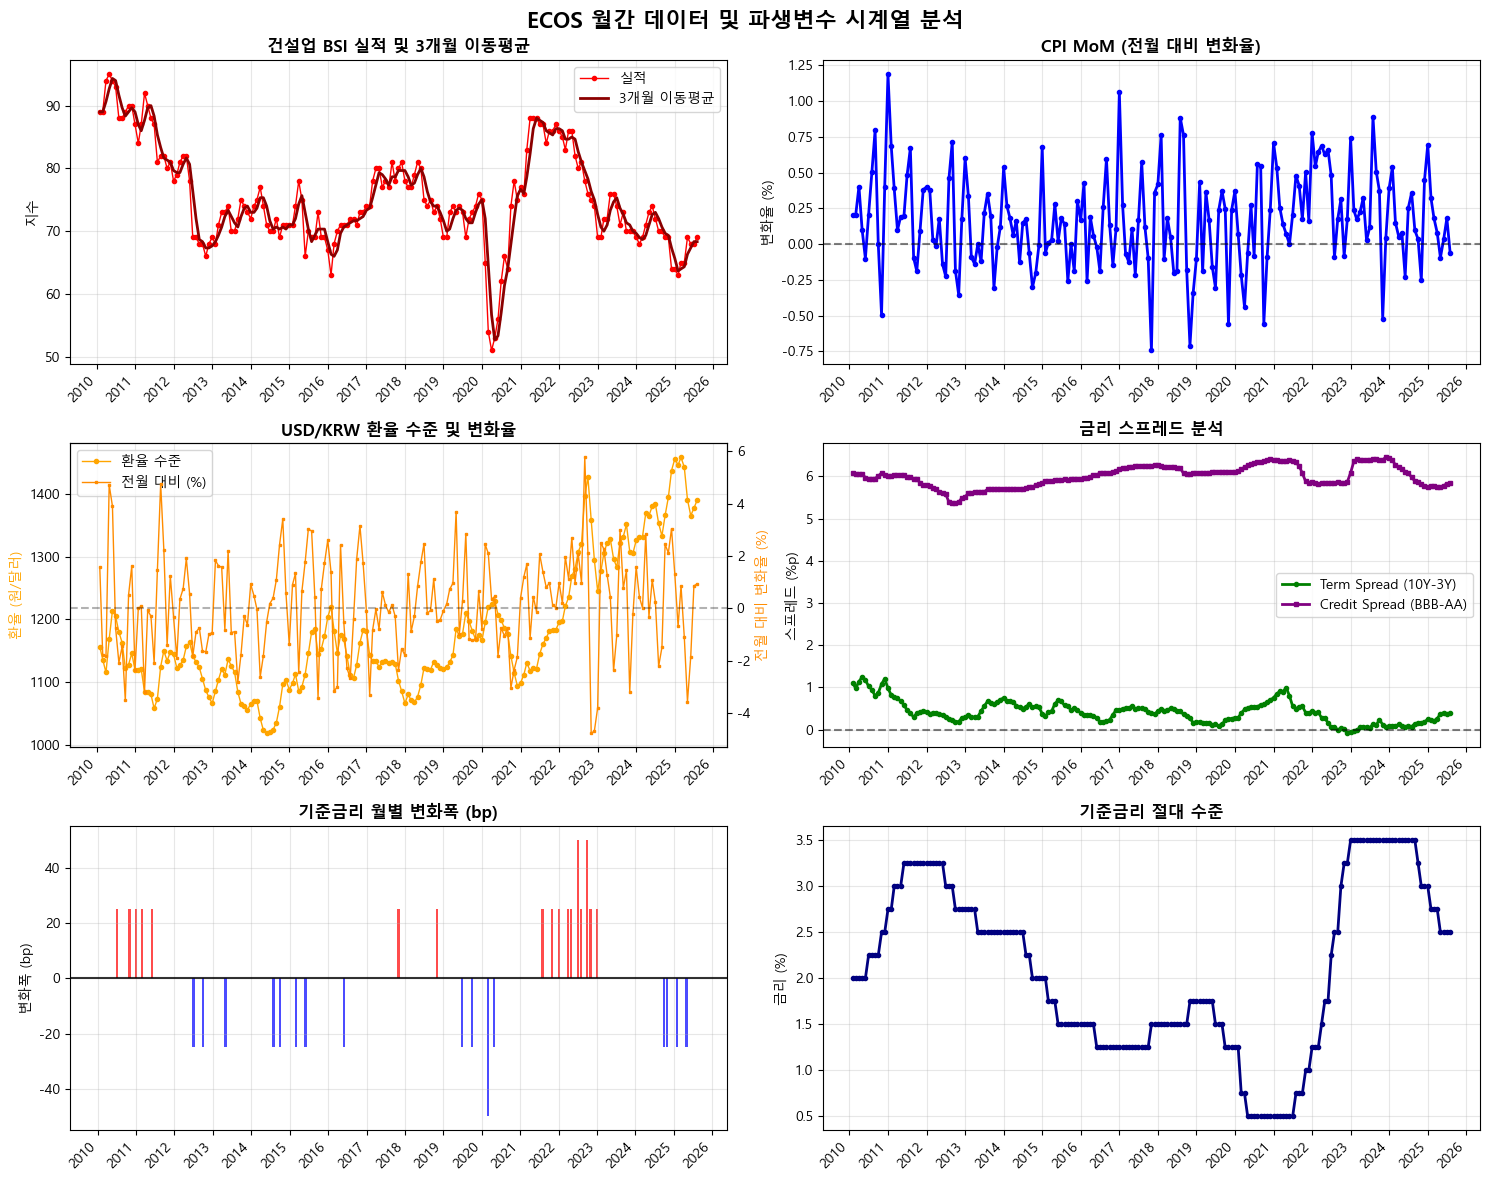


=== ÏõîÍ∞Ñ ÌååÏÉùÎ≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ===
                      cpi_mom  base_rate_mdiff_bp  term_spread  credit_spread  \
cpi_mom                 1.000               0.206        0.052          0.035   
base_rate_mdiff_bp      0.206               1.000        0.024          0.065   
term_spread             0.052               0.024        1.000          0.016   
credit_spread           0.035               0.065        0.016          1.000   
exchange_ma3            0.063               0.053       -0.513          0.146   
exchange_mom            0.043              -0.024       -0.024          0.021   
construction_bsi_ma3    0.209               0.385        0.480          0.055   
construction_bsi_mom   -0.136               0.105        0.116          0.127   

                      exchange_ma3  exchange_mom  construction_bsi_ma3  \
cpi_mom                      0.063         0.043                 0.209   
base_rate_mdiff_bp           0.053        -0.024                 0.385   
te

In [54]:
# ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Î∞è ÌååÏÉùÎ≥ÄÏàò ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú datetime Ïª¨Îüº ÏÉùÏÑ± (ÏõêÎ≥∏ dateÎäî YYYY-MM Î¨∏ÏûêÏó¥ Ïú†ÏßÄ)
ecos_monthly['date_for_plot'] = pd.to_datetime(ecos_monthly['date'] + '-01')

# Ï£ºÏöî ÏõîÍ∞Ñ ÌååÏÉùÎ≥ÄÏàò ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('ECOS ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Î∞è ÌååÏÉùÎ≥ÄÏàò ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù', fontsize=16, fontweight='bold')

# 1. Í±¥ÏÑ§ÏóÖ BSI Ïã§Ï†Å Î∞è Ïù¥ÎèôÌèâÍ∑†
axes[0,0].plot(ecos_monthly['date_for_plot'], ecos_monthly['construction_bsi_actual'], 'o-', color='red', linewidth=1, markersize=3, label='Ïã§Ï†Å')
axes[0,0].plot(ecos_monthly['date_for_plot'], ecos_monthly['construction_bsi_ma3'], '-', color='darkred', linewidth=2, label='3Í∞úÏõî Ïù¥ÎèôÌèâÍ∑†')
axes[0,0].set_title('Í±¥ÏÑ§ÏóÖ BSI Ïã§Ï†Å Î∞è 3Í∞úÏõî Ïù¥ÎèôÌèâÍ∑†', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('ÏßÄÏàò')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].legend()

# 2. CPI MoM Î≥ÄÌôîÏú®
axes[0,1].plot(ecos_monthly['date_for_plot'], ecos_monthly['cpi_mom'], 'o-', color='blue', linewidth=2, markersize=3)
axes[0,1].set_title('CPI MoM (Ï†ÑÏõî ÎåÄÎπÑ Î≥ÄÌôîÏú®)', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Î≥ÄÌôîÏú® (%)')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].axhline(y=0, color='black', linestyle='--', alpha=0.5)

# 3. ÌôòÏú® Î∞è Î≥ÄÌôîÏú®
ax3 = axes[1,0]
ax3_twin = ax3.twinx()
line1 = ax3.plot(ecos_monthly['date_for_plot'], ecos_monthly['exchange_usd_krw_close'], 'o-', color='orange', linewidth=1, markersize=3, label='ÌôòÏú® ÏàòÏ§Ä')
line2 = ax3_twin.plot(ecos_monthly['date_for_plot'], ecos_monthly['exchange_mom'], 's-', color='darkorange', linewidth=1, markersize=2, label='Ï†ÑÏõî ÎåÄÎπÑ (%)')
ax3.set_title('USD/KRW ÌôòÏú® ÏàòÏ§Ä Î∞è Î≥ÄÌôîÏú®', fontsize=12, fontweight='bold')
ax3.set_ylabel('ÌôòÏú® (Ïõê/Îã¨Îü¨)', color='orange')
ax3_twin.set_ylabel('Ï†ÑÏõî ÎåÄÎπÑ Î≥ÄÌôîÏú® (%)', color='darkorange')
ax3.grid(True, alpha=0.3)
ax3_twin.axhline(y=0, color='black', linestyle='--', alpha=0.3)

# Î≤îÎ°Ä Í≤∞Ìï©
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_twin.get_legend_handles_labels()
ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# 4. Term Spread & Credit Spread
axes[1,1].plot(ecos_monthly['date_for_plot'], ecos_monthly['term_spread'], 'o-', color='green', linewidth=2, markersize=3, label='Term Spread (10Y-3Y)')
axes[1,1].plot(ecos_monthly['date_for_plot'], ecos_monthly['credit_spread'], 's-', color='purple', linewidth=2, markersize=3, label='Credit Spread (BBB-AA)')
axes[1,1].set_title('Í∏àÎ¶¨ Ïä§ÌîÑÎ†àÎìú Î∂ÑÏÑù', fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('Ïä§ÌîÑÎ†àÎìú (%p)')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].legend()
axes[1,1].axhline(y=0, color='black', linestyle='--', alpha=0.5)

# 5. Í∏∞Ï§ÄÍ∏àÎ¶¨ Î≥ÄÌôîÌè≠
axes[2,0].bar(ecos_monthly['date_for_plot'], ecos_monthly['base_rate_mdiff_bp'], 
              color=['red' if x > 0 else 'blue' for x in ecos_monthly['base_rate_mdiff_bp']], alpha=0.7, width=20)
axes[2,0].set_title('Í∏∞Ï§ÄÍ∏àÎ¶¨ ÏõîÎ≥Ñ Î≥ÄÌôîÌè≠ (bp)', fontsize=12, fontweight='bold')
axes[2,0].set_ylabel('Î≥ÄÌôîÌè≠ (bp)')
axes[2,0].grid(True, alpha=0.3)
axes[2,0].axhline(y=0, color='black', linestyle='-', alpha=0.8)

# 6. Í∏∞Ï§ÄÍ∏àÎ¶¨ Ï†àÎåÄÏàòÏ§Ä
axes[2,1].plot(ecos_monthly['date_for_plot'], ecos_monthly['base_rate'], 'o-', color='navy', linewidth=2, markersize=3)
axes[2,1].set_title('Í∏∞Ï§ÄÍ∏àÎ¶¨ Ï†àÎåÄ ÏàòÏ§Ä', fontsize=12, fontweight='bold')
axes[2,1].set_ylabel('Í∏àÎ¶¨ (%)')
axes[2,1].grid(True, alpha=0.3)

# XÏ∂ï ÎÇ†Ïßú Ìè¨Îß∑ÌåÖ
for ax in axes.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator())
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# ÏãúÍ∞ÅÌôî ÏôÑÎ£å ÌõÑ ÏûÑÏãú Ïª¨Îüº Ï†úÍ±∞
ecos_monthly = ecos_monthly.drop(columns=['date_for_plot'])

# ÏõîÍ∞Ñ ÌååÏÉùÎ≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
print("\n=== ÏõîÍ∞Ñ ÌååÏÉùÎ≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ===")
available_derived_vars = [col for col in monthly_derived_vars if col in ecos_monthly.columns]
correlation_matrix = ecos_monthly[available_derived_vars].corr()
print(correlation_matrix.round(3))

# Í±¥ÏÑ§ÏóÖ BSIÏôÄ Îã§Î•∏ ÌååÏÉùÎ≥ÄÏàòÎì§Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
print("\n=== Í±¥ÏÑ§ÏóÖ BSI Ïã§Ï†ÅÍ≥º ÌååÏÉùÎ≥ÄÏàòÎì§Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ===")
bsi_correlation = ecos_monthly[available_derived_vars + ['construction_bsi_actual']].corr()['construction_bsi_actual'].abs().sort_values(ascending=False)
print(bsi_correlation.head(10).round(3))

print("\n=== ÏµúÏ¢Ö ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ ÏöîÏïΩ ===")
print(f"Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ: {ecos_monthly['date'].min()} ~ {ecos_monthly['date'].max()}")
print(f"Ï¥ù Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏: {len(ecos_monthly)}Í∞ú")
print(f"Ï¥ù Î≥ÄÏàò(Ïª¨Îüº): {len(ecos_monthly.columns)}Í∞ú")
print(f"ÌååÏÉùÎ≥ÄÏàò: {len(available_derived_vars)}Í∞ú")

In [56]:
ecos_monthly

date  base_rate  base_rate_mdiff_bp      cpi   cpi_mom  \
0    2010-02       2.00                 0.0   85.523  0.201521   
1    2010-03       2.00                 0.0   85.696  0.202285   
2    2010-04       2.00                 0.0   86.041  0.402586   
3    2010-05       2.00                 0.0   86.128  0.101115   
4    2010-06       2.00                 0.0   86.041 -0.101012   
..       ...        ...                 ...      ...       ...   
182  2025-04       2.75                 0.0  116.380  0.077393   
183  2025-05       2.50               -25.0  116.270 -0.094518   
184  2025-06       2.50                 0.0  116.310  0.034403   
185  2025-07       2.50                 0.0  116.520  0.180552   
186  2025-08       2.50                 0.0  116.450 -0.060076   

     construction_bsi_actual  construction_bsi_ma3  construction_bsi_mom  \
0                       89.0             89.000000                   0.0   
1                       89.0             89.000000                   0.0   
2                       94.0             90.666667                   5.0   
3                       95.0             92.666667                   1.0   
4                       94.0             94.333333                  -1.0   
..                       ...                   ...                   ...   
182                     65.0             64.333333                   0.0   
183                     69.0             66.333333                   4.0   
184                     68.0             67.333333                  -1.0   
185                     68.0             68.333333                   0.0   
186                     69.0             68.333333                   1.0   

     exchange_usd_krw_close  exchange_mom  ...  construction_bsi_forecast  \
0                   1156.83      1.585922  ...                       90.0   
1                   1136.11     -1.791102  ...                       96.0   
2                   1115.71     -1.795601  ...                       94.0   
3                   1168.41      4.723450  ...                       98.0   
4                   1214.02      3.903595  ...                       95.0   
..                      ...           ...  ...                        ...   
182                 1441.92     -1.097454  ...                       65.0   
183                 1390.70     -3.552208  ...                       65.0   
184                 1365.15     -1.837204  ...                       69.0   
185                 1376.92      0.862176  ...                       68.0   
186                 1389.86      0.939779  ...                       67.0   

       esi  housing_lease_price  housing_sale_price  \
0    117.3               58.872              65.040   
1    116.1               59.271              65.201   
2    117.5               59.643              65.327   
3    116.8               59.886              65.358   
4    115.5               60.123              65.365   
..     ...                  ...                 ...   
182   87.5               93.371              92.994   
183   92.2               93.414              93.038   
184   92.8               93.483              93.164   
185   92.9               93.555              93.317   
186   94.6               93.598              93.357   

     import_price_non_metal_mineral  import_price_steel_primary  \
0                             73.47                      104.28   
1                             73.47                      108.21   
2                             73.47                      116.42   
3                             78.92                      116.76   
4                             74.12                      114.22   
..                              ...                         ...   
182                          146.60                      119.97   
183                          146.60                      119.42   
184                          143.66                      118.61   
185                          143.66           

In [57]:
pd.DataFrame.to_csv(ecos_monthly, 'ecos_monthly_data.csv', index=False)

## ECOS Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ

Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† Ïù¥ÌõÑ ÏàòÌñâ

In [ ]:
# StandardScalerÎ•º ÏÇ¨Ïö©Ìïú ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ
from sklearn.preprocessing import StandardScaler
import pandas as pd

if 'ecos_monthly' in locals():
    print("=== ECOS ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ ===")
    
    # date_yyyymm Ïª¨Îüº Î∂ÑÎ¶¨
    date_yyyymm_col = ecos_monthly['date_yyyymm'].copy()
    
    # ÏàòÏπòÌòï Ïª¨ÎüºÎßå ÏÑ†ÌÉù (date_yyyymm Ï†úÏô∏)
    numeric_cols = [col for col in ecos_monthly.columns if col != 'date_yyyymm']
    numeric_data = ecos_monthly[numeric_cols].copy()
    
    print(f"Ïä§ÏºÄÏùºÎßÅ ÎåÄÏÉÅ Ïª¨Îüº: {len(numeric_cols)}Í∞ú")
    print(f"Ïª¨ÎüºÎ™Ö: {list(numeric_cols)}")
    
    # Í≤∞Ï∏°Í∞í ÌôïÏù∏
    print(f"\nÍ≤∞Ï∏°Í∞í ÌòÑÌô©:")
    missing_counts = numeric_data.isnull().sum()
    print(missing_counts[missing_counts > 0])
    
    # Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎã§Î©¥ Ï≤òÎ¶¨ (forward fill ÏÇ¨Ïö©)
    if numeric_data.isnull().any().any():
        print("Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨ Ï§ë...")
        numeric_data = numeric_data.fillna(method='ffill').fillna(method='bfill')
        print("Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨ ÏôÑÎ£å")
    
    # Ïä§ÏºÄÏùºÎßÅ Ï†Ñ ÌÜµÍ≥Ñ
    print(f"\nÏä§ÏºÄÏùºÎßÅ Ï†Ñ Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ:")
    print(numeric_data.describe().round(2))
    
    # StandardScaler Ï†ÅÏö©
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)
    
    # Ïä§ÏºÄÏùºÎßÅÎêú Îç∞Ïù¥ÌÑ∞Î•º DataFrameÏúºÎ°ú Î≥ÄÌôò
    ecos_scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols, index=numeric_data.index)
    
    # date_yyyymm Ïª¨Îüº Ï∂îÍ∞Ä
    ecos_scaled_df.insert(0, 'date_yyyymm', date_yyyymm_col)
    
    print(f"\nÏä§ÏºÄÏùºÎßÅ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ:")
    scaled_numeric_cols = [col for col in ecos_scaled_df.columns if col != 'date_yyyymm']
    print(ecos_scaled_df[scaled_numeric_cols].describe().round(2))
    
    print(f"\nÏµúÏ¢Ö Ïä§ÏºÄÏùºÎßÅÎêú Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {ecos_scaled_df.shape}")
    print("Ïä§ÏºÄÏùºÎßÅÎêú Îç∞Ïù¥ÌÑ∞Î•º 'ecos_scaled_df' Î≥ÄÏàòÏóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§.")
    
    # ÏµúÏ¢Ö Í≤∞Í≥º ÌôïÏù∏
    print("\nÏµúÏ¢Ö Ï≤òÎ¶¨Îêú ECOS ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:")
    print(ecos_scaled_df.head(10))
    
else:
    print("ecos_monthly Î≥ÄÏàòÍ∞Ä ÏóÜÏäµÎãàÎã§. Ïù¥Ï†Ñ ÏÖÄÏùÑ Î®ºÏ†Ä Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.")

' # StandardScalerÎ•º ÏÇ¨Ïö©Ìïú Î∂ÑÍ∏∞Î≥Ñ Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ\nfrom sklearn.preprocessing import StandardScaler\nimport pandas as pd\n\nif \'ecos_quarterly\' in locals():\n    print("=== ECOS Î∂ÑÍ∏∞Î≥Ñ Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ ===")\n\n    # year, quarter Ïª¨Îüº Î∂ÑÎ¶¨\n    year_col = ecos_quarterly[\'year\'].copy()\n    quarter_col = ecos_quarterly[\'quarter\'].copy()\n\n    # ÏàòÏπòÌòï Ïª¨ÎüºÎßå ÏÑ†ÌÉù (year, quarter Ï†úÏô∏)\n    numeric_cols = [col for col in ecos_quarterly.columns if col not in [\'year\', \'quarter\']]\n    numeric_data = ecos_quarterly[numeric_cols].copy()\n\n    print(f"Ïä§ÏºÄÏùºÎßÅ ÎåÄÏÉÅ Ïª¨Îüº: {len(numeric_cols)}Í∞ú")\n    print(f"Ïª¨ÎüºÎ™Ö: {list(numeric_cols)}")\n\n    # Í≤∞Ï∏°Í∞í ÌôïÏù∏\n    print(f"\nÍ≤∞Ï∏°Í∞í ÌòÑÌô©:")\n    missing_counts = numeric_data.isnull().sum()\n    print(missing_counts[missing_counts > 0])\n\n    # Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎã§Î©¥ Ï≤òÎ¶¨ (forward fill ÏÇ¨Ïö©)\n    if numeric_data.isnull().any().any():\n        print("\nÍ≤∞Ï∏°Í∞íÏùÑ forwar

In [ ]:
# ECOS ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
if 'ecos_monthly' in locals():
    # CSV ÌååÏùºÎ°ú Ï†ÄÏû•
    ecos_monthly.to_csv('ecos_monthly_final.csv', index=False)
    print("ECOS ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• ÏôÑÎ£å: ecos_monthly_final.csv")
    print(f"Ï†ÄÏû•Îêú Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {ecos_monthly.shape}")
    print(f"Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ: {ecos_monthly['date_yyyymm'].min()} ~ {ecos_monthly['date_yyyymm'].max()}")
    
    # Î≥ÄÏàò ÏöîÏïΩ
    print(f"\nÏµúÏ¢Ö Î≥ÄÏàò Î™©Î°ù ({len(ecos_monthly.columns)}Í∞ú):")
    for i, col in enumerate(ecos_monthly.columns, 1):
        print(f"  {i:2d}. {col}")
    
else:
    print("ecos_monthly Î≥ÄÏàòÎ•º Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Ïù¥Ï†Ñ ÏÖÄÎì§ÏùÑ Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.")

print("\n" + "="*50)
print("ECOS Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å!")
print("="*50)

# DART Í±¥ÏÑ§ÏóÖ Ïû¨Î¨¥Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

DARTÏóêÏÑú ÏàòÏßëÌïú Í±¥ÏÑ§ÏóÖ Í∏∞ÏóÖÏùò Î∂ÑÍ∏∞Î≥Ñ Ïû¨Î¨¥Îç∞Ïù¥ÌÑ∞Î•º Ï†ÑÏ≤òÎ¶¨Ìï©ÎãàÎã§.

**Ï≤òÎ¶¨ Í≤∞Í≥º**: dart_final (Î∂ÑÍ∏∞Î≥Ñ Ïû¨Î¨¥Îç∞Ïù¥ÌÑ∞)

---

In [ ]:
# DART Ïû¨Î¨¥Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Ïö© ÎùºÏù¥Î∏åÎü¨Î¶¨
import pandas as pd
import numpy as np
import sys
import os
from dotenv import load_dotenv
from sklearn.preprocessing import StandardScaler

# ÌîÑÎ°úÏ†ùÌä∏ Î£®Ìä∏ Í≤ΩÎ°ú ÏÑ§Ï†ï
current_dir = os.path.dirname(os.path.abspath('preprocessing.ipynb'))
parent_dir = os.path.dirname(current_dir)
db_folder = os.path.join(parent_dir, 'DB')
sys.path.append(db_folder)

# ÌôòÍ≤ΩÎ≥ÄÏàò Î°úÎìú
env_file_path = os.path.join(parent_dir, '.env')
load_dotenv(env_file_path)

# Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞
try:
    from db_query import DatabaseConnection
    print("Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Î™®Îìà Î°úÎìú ÏÑ±Í≥µ")
except ImportError as e:
    print(f"Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Î™®Îìà Î°úÎìú Ïã§Ìå®: {e}")
    DatabaseConnection = None

print("DART Ïû¨Î¨¥Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÌôòÍ≤Ω ÏÑ§Ï†ï ÏôÑÎ£å")

In [ ]:
# DART Ïû¨Î¨¥Îç∞Ïù¥ÌÑ∞ Î°úÎìú
try:
    # Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞
    if DatabaseConnection is None:
        raise Exception("Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Î™®ÎìàÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")
    
    db = DatabaseConnection()
    if not db.connect():
        raise Exception("Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞Ïóê Ïã§Ìå®ÌñàÏäµÎãàÎã§.")
    
    print("‚úÖ Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞ ÏÑ±Í≥µ!")
    
    # DART Îç∞Ïù¥ÌÑ∞ Ï°∞Ìöå
    dart_data = db.get_dart_data()
    
    if dart_data is not None and not dart_data.empty:
        print(f"üìä DART Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å: {dart_data.shape}")
        
        # Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞
        columns_to_remove = ['created_at', 'updated_at', 'id']
        existing_remove_cols = [col for col in columns_to_remove if col in dart_data.columns]
        if existing_remove_cols:
            dart_data = dart_data.drop(columns=existing_remove_cols)
            print(f"üóëÔ∏è Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞: {existing_remove_cols}")
        
        # Ïª¨ÎüºÎ™Ö Îß§Ìïë (DB Ïª¨ÎüºÎ™Ö ‚Üí Ï≤òÎ¶¨Ïö© Ïª¨ÎüºÎ™Ö)
        column_mapping = {
            'total_assets': 'ÏûêÏÇ∞Ï¥ùÍ≥Ñ',
            'total_liabilities': 'Î∂ÄÏ±ÑÏ¥ùÍ≥Ñ', 
            'total_equity': 'ÏûêÎ≥∏Ï¥ùÍ≥Ñ',
            'revenue': 'Îß§Ï∂úÏï°',
            'operating_profit': 'ÏòÅÏóÖÏù¥Ïùµ',
            'quarterly_profit': 'Î∂ÑÍ∏∞ÏàúÏù¥Ïùµ'
        }
        dart_data = dart_data.rename(columns=column_mapping)
        
        # ÏàòÏπòÌòï Ïª¨Îüº Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÌôò
        exclude_cols = ['corp_name', 'quarter', 'date', 'corp_code', 'report_date']
        numeric_column_names = [col for col in dart_data.columns if col not in exclude_cols]
        
        for col in numeric_column_names:
            if dart_data[col].dtype == 'object':
                dart_data[col] = pd.to_numeric(dart_data[col], errors='coerce')
        
        print(f"üìÖ Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ: {dart_data['year'].min()}ÎÖÑ ~ {dart_data['year'].max()}ÎÖÑ")
        print(f"üè¢ Ìè¨Ìï® Í∏∞ÏóÖ: {dart_data['corp_name'].nunique()}Í∞úÏÇ¨")
        
        # Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞
        print("\nüîç DART Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞:")
        print(dart_data.head())
        
        # Í∏∞ÏóÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò
        print(f"\nüè¢ Í∏∞ÏóÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò:")
        corp_counts = dart_data['corp_name'].value_counts()
        for corp, count in corp_counts.head(10).items():
            print(f"  {corp}: {count}Í∞ú")
        
    else:
        print("‚ùå DART Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌï† Ïàò ÏóÜÏäµÎãàÎã§.")
        
except Exception as e:
    print(f"‚ùå DART Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
    print("CSV ÌååÏùºÏóêÏÑú Î°úÎìúÎ•º ÏãúÎèÑÌï©ÎãàÎã§...")
    
    # CSV ÌååÏùºÏóêÏÑú Î°úÎìú ÏãúÎèÑ
    try:
        dart_data = pd.read_csv('../dart/dart_out/dart_merged_data.csv')
        print(f"üìä CSVÏóêÏÑú DART Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å: {dart_data.shape}")
    except Exception as csv_error:
        print(f"‚ùå CSV ÌååÏùº Î°úÎìúÎèÑ Ïã§Ìå®: {csv_error}")
        dart_data = None

DART Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å: (1248, 14)
Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞: ['created_at', 'updated_at', 'id']
Ïª¨Îüº Ï†úÍ±∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (1248, 11)
Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω ÌõÑ: ['corp_name', 'corp_code', 'year', 'quarter', 'report_date', 'ÏûêÏÇ∞Ï¥ùÍ≥Ñ', 'Î∂ÄÏ±ÑÏ¥ùÍ≥Ñ', 'ÏûêÎ≥∏Ï¥ùÍ≥Ñ', 'Îß§Ï∂úÏï°', 'ÏòÅÏóÖÏù¥Ïùµ', 'Î∂ÑÍ∏∞ÏàúÏù¥Ïùµ']

=== Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÌôò ===
ÏûêÏÇ∞Ï¥ùÍ≥Ñ: object ‚Üí float64
Î∂ÄÏ±ÑÏ¥ùÍ≥Ñ: object ‚Üí float64
ÏûêÎ≥∏Ï¥ùÍ≥Ñ: object ‚Üí float64
Îß§Ï∂úÏï°: object ‚Üí float64
ÏòÅÏóÖÏù¥Ïùµ: object ‚Üí float64
Î∂ÑÍ∏∞ÏàúÏù¥Ïùµ: object ‚Üí float64

Ïª¨Îüº Ï†ïÎ≥¥:
['corp_name', 'corp_code', 'year', 'quarter', 'report_date', 'ÏûêÏÇ∞Ï¥ùÍ≥Ñ', 'Î∂ÄÏ±ÑÏ¥ùÍ≥Ñ', 'ÏûêÎ≥∏Ï¥ùÍ≥Ñ', 'Îß§Ï∂úÏï°', 'ÏòÅÏóÖÏù¥Ïùµ', 'Î∂ÑÍ∏∞ÏàúÏù¥Ïùµ']

Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞:
  corp_name corp_code  year quarter report_date          ÏûêÏÇ∞Ï¥ùÍ≥Ñ          Î∂ÄÏ±ÑÏ¥ùÍ≥Ñ  \
0     DLÏù¥Ïï§Ïî®   1524093  2015      Q4  2015-12-01  1.206489e+13  7.259125e+12   
1     DLÏù¥Ïï§Ïî®   1524093  2016      Q1  2016-03-01  1.2332

In [13]:
# Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ ÏÉÅÌÉú ÏßÅÏ†ë ÌôïÏù∏
try:
    if 'db' not in locals() or not hasattr(db, 'connection') or not db.connection:
        db = DatabaseConnection()
        db.connect()
    
    # ÌÖåÏù¥Î∏î Ìñâ Ïàò ÌôïÏù∏
    count_query = "SELECT COUNT(*) as total_rows FROM dart_data"
    count_result = db.execute_query(count_query)
    print(f"DART ÌÖåÏù¥Î∏î Ï¥ù Ìñâ Ïàò: {count_result.iloc[0]['total_rows']}")
    
    # ÌÖåÏù¥Î∏î Íµ¨Ï°∞ ÌôïÏù∏
    desc_query = "DESCRIBE dart_data"
    desc_result = db.execute_query(desc_query)
    print(f"\nDART ÌÖåÏù¥Î∏î Íµ¨Ï°∞:")
    print(desc_result)
    
    # ÏµúÍ∑º 10Í∞ú Î†àÏΩîÎìú ÌôïÏù∏
    sample_query = "SELECT corp_name, year, quarter, revenue FROM dart_data ORDER BY id DESC LIMIT 10"
    sample_result = db.execute_query(sample_query)
    print(f"\nÏµúÍ∑º 10Í∞ú Î†àÏΩîÎìú:")
    print(sample_result)
    
    # Í∏∞ÏóÖÎ≥Ñ Í∞úÏàò ÌôïÏù∏
    corp_count_query = "SELECT corp_name, COUNT(*) as count FROM dart_data GROUP BY corp_name ORDER BY count DESC"
    corp_count_result = db.execute_query(corp_count_query)
    print(f"\nÍ∏∞ÏóÖÎ≥Ñ Î†àÏΩîÎìú Ïàò:")
    print(corp_count_result.head(10))
    
except Exception as e:
    print(f"Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ ÏßÅÏ†ë ÌôïÏù∏ Ï§ë Ïò§Î•ò: {e}")
    import traceback
    traceback.print_exc()

DART ÌÖåÏù¥Î∏î Ï¥ù Ìñâ Ïàò: 1248

DART ÌÖåÏù¥Î∏î Íµ¨Ï°∞:
                Field           Type Null  Key            Default  \
0                  id            int   NO  PRI               None   
1           corp_name    varchar(50)   NO  MUL               None   
2           corp_code     varchar(8)   NO                    None   
3                year            int   NO                    None   
4             quarter     varchar(2)   NO                    None   
5         report_date           date   NO  MUL               None   
6        total_assets  decimal(20,2)  YES                    None   
7   total_liabilities  decimal(20,2)  YES                    None   
8        total_equity  decimal(20,2)  YES                    None   
9             revenue  decimal(20,2)  YES                    None   
10   operating_profit  decimal(20,2)  YES                    None   
11   quarterly_profit  decimal(20,2)  YES                    None   
12         created_at      timestamp  YES     

In [14]:
dart_data

corp_name corp_code  year quarter report_date          ÏûêÏÇ∞Ï¥ùÍ≥Ñ  \
0        DLÏù¥Ïï§Ïî®   1524093  2015      Q4  2015-12-01  1.206489e+13   
1        DLÏù¥Ïï§Ïî®   1524093  2016      Q1  2016-03-01  1.233208e+13   
2        DLÏù¥Ïï§Ïî®   1524093  2016      Q2  2016-06-01  1.237828e+13   
3        DLÏù¥Ïï§Ïî®   1524093  2016      Q3  2016-09-01  1.218542e+13   
4        DLÏù¥Ïï§Ïî®   1524093  2016      Q4  2016-12-01  1.239151e+13   
...        ...       ...   ...     ...         ...           ...   
1243     Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ   1316245  2024      Q2  2024-06-01  5.066724e+12   
1244     Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ   1316245  2024      Q3  2024-09-01  5.100602e+12   
1245     Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ   1316245  2024      Q4  2024-12-01  6.218813e+12   
1246     Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ   1316245  2025      Q1  2025-03-01  6.689856e+12   
1247     Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ   1316245  2025      Q2  2025-06-01  6.711119e+12   

              Î∂ÄÏ±ÑÏ¥ùÍ≥Ñ          ÏûêÎ≥∏Ï¥ùÍ≥Ñ           Îß§Ï∂úÏï°          ÏòÅÏóÖÏù¥Ïùµ         Î∂ÑÍ∏∞ÏàúÏù¥Ïùµ  
0     7.259125e+12  4.805769e+12           NaN           NaN           NaN  
1     7.389715e+12  4.942363e+12  2.253709e+12  9.077587e+10  3.103707e+10  
2     7.324959e+12  5.053324e+12  2.563786e+12  1.361732e+11  1.197966e+11  
3     7.042494e+12  5.142928e+12  2.457364e+12  1.306544e+11  1.090875e+11  
4     7.246135e+12  5.145374e+12  2.578911e+12  6.178428e+10  3.327409e+10  
...            ...           ...           ...           ...           ...  
1243  3.811208e+12  1.255516e+12  1.193776e+12  6.265961e+10  2.820423e+10  
1244  3.774763e+12  1.325839e+12  1.145185e+12  1.114241e+11  7.241692e+10  
1245  4.163194e+12  2.055618e+12  1.571511e+12  1.322304e+11  9.607912e+10  
1246  4.574591e+12  2.115265e+12  1.076135e+12  1.023871e+11  1.036293e+11  
1247  4.536017e+12  2.175102e+12  1.525285e+12  1.642614e+11  8.734873e+10  

[1248 rows x 11 columns]

In [15]:
# DART Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏
if 'dart_data' in locals():
    print("=== DART Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===")
    print(f"Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {dart_data.shape}")
    print(f"Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ: {dart_data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    print("\n=== Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ===")
    print(dart_data.dtypes)

    print("\n=== Í≤∞Ï∏°Í∞í ÌôïÏù∏ ===")
    print(dart_data.isnull().sum())

    print("\n=== ÏàòÏπòÌòï Ïª¨Îüº Í∏∞Î≥∏ ÌÜµÍ≥Ñ ===")
    print(dart_data.describe())

=== DART Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===
Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (1248, 11)
Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ: 0.33 MB

=== Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ===
corp_name       object
corp_code       object
year             int64
quarter         object
report_date     object
ÏûêÏÇ∞Ï¥ùÍ≥Ñ           float64
Î∂ÄÏ±ÑÏ¥ùÍ≥Ñ           float64
ÏûêÎ≥∏Ï¥ùÍ≥Ñ           float64
Îß§Ï∂úÏï°            float64
ÏòÅÏóÖÏù¥Ïùµ           float64
Î∂ÑÍ∏∞ÏàúÏù¥Ïùµ          float64
dtype: object

=== Í≤∞Ï∏°Í∞í ÌôïÏù∏ ===
corp_name       0
corp_code       0
year            0
quarter         0
report_date     0
ÏûêÏÇ∞Ï¥ùÍ≥Ñ           42
Î∂ÄÏ±ÑÏ¥ùÍ≥Ñ           42
ÏûêÎ≥∏Ï¥ùÍ≥Ñ           42
Îß§Ï∂úÏï°            75
ÏòÅÏóÖÏù¥Ïùµ           75
Î∂ÑÍ∏∞ÏàúÏù¥Ïùµ          75
dtype: int64

=== ÏàòÏπòÌòï Ïª¨Îüº Í∏∞Î≥∏ ÌÜµÍ≥Ñ ===
              year          ÏûêÏÇ∞Ï¥ùÍ≥Ñ          Î∂ÄÏ±ÑÏ¥ùÍ≥Ñ          ÏûêÎ≥∏Ï¥ùÍ≥Ñ           Îß§Ï∂úÏï°  \
count  1248.000000  1.206000e+03  1.206000e+03  1.206000e+03  1.173000e+03   
mean   2020.128205  4.837534e+12  2.752123e+12  2.085

## DART Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ï

In [16]:
dart_data

corp_name corp_code  year quarter report_date          ÏûêÏÇ∞Ï¥ùÍ≥Ñ  \
0        DLÏù¥Ïï§Ïî®   1524093  2015      Q4  2015-12-01  1.206489e+13   
1        DLÏù¥Ïï§Ïî®   1524093  2016      Q1  2016-03-01  1.233208e+13   
2        DLÏù¥Ïï§Ïî®   1524093  2016      Q2  2016-06-01  1.237828e+13   
3        DLÏù¥Ïï§Ïî®   1524093  2016      Q3  2016-09-01  1.218542e+13   
4        DLÏù¥Ïï§Ïî®   1524093  2016      Q4  2016-12-01  1.239151e+13   
...        ...       ...   ...     ...         ...           ...   
1243     Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ   1316245  2024      Q2  2024-06-01  5.066724e+12   
1244     Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ   1316245  2024      Q3  2024-09-01  5.100602e+12   
1245     Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ   1316245  2024      Q4  2024-12-01  6.218813e+12   
1246     Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ   1316245  2025      Q1  2025-03-01  6.689856e+12   
1247     Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ   1316245  2025      Q2  2025-06-01  6.711119e+12   

              Î∂ÄÏ±ÑÏ¥ùÍ≥Ñ          ÏûêÎ≥∏Ï¥ùÍ≥Ñ           Îß§Ï∂úÏï°          ÏòÅÏóÖÏù¥Ïùµ         Î∂ÑÍ∏∞ÏàúÏù¥Ïùµ  
0     7.259125e+12  4.805769e+12           NaN           NaN           NaN  
1     7.389715e+12  4.942363e+12  2.253709e+12  9.077587e+10  3.103707e+10  
2     7.324959e+12  5.053324e+12  2.563786e+12  1.361732e+11  1.197966e+11  
3     7.042494e+12  5.142928e+12  2.457364e+12  1.306544e+11  1.090875e+11  
4     7.246135e+12  5.145374e+12  2.578911e+12  6.178428e+10  3.327409e+10  
...            ...           ...           ...           ...           ...  
1243  3.811208e+12  1.255516e+12  1.193776e+12  6.265961e+10  2.820423e+10  
1244  3.774763e+12  1.325839e+12  1.145185e+12  1.114241e+11  7.241692e+10  
1245  4.163194e+12  2.055618e+12  1.571511e+12  1.322304e+11  9.607912e+10  
1246  4.574591e+12  2.115265e+12  1.076135e+12  1.023871e+11  1.036293e+11  
1247  4.536017e+12  2.175102e+12  1.525285e+12  1.642614e+11  8.734873e+10  

[1248 rows x 11 columns]

In [28]:
# 1Îã®Í≥Ñ: Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞ (corp_code, report_date)
print("=== 1Îã®Í≥Ñ: Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞ ===")

print("Ï†úÍ±∞ Ï†Ñ Ïª¨Îüº:")
print(dart_data.columns.tolist())

# Ï†úÍ±∞Ìï† Ïª¨ÎüºÎì§ (corp_nameÏùÄ Ïú†ÏßÄ)
columns_to_drop_new = ['corp_code','report_date']

# Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî Ïª¨ÎüºÎßå Ï†úÍ±∞
existing_columns_to_drop_new = [col for col in columns_to_drop_new if col in dart_data.columns]
print(f"\nÏ†úÍ±∞Ìï† Ïª¨Îüº: {existing_columns_to_drop_new}")

# Ïª¨Îüº Ï†úÍ±∞
dart_processed_new = dart_data.drop(columns=existing_columns_to_drop_new)

print(f"\nÏ†úÍ±∞ ÌõÑ Ïª¨Îüº:")
print(dart_processed_new.columns.tolist())
print(f"\nÎç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {dart_processed_new.shape}")

# Í≤∞Í≥º ÌôïÏù∏
print("\nÏ≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:")
print(dart_processed_new.head())

# Í∏∞ÏóÖÎ™Ö ÌôïÏù∏
print(f"\nÌè¨Ìï®Îêú Í∏∞ÏóÖ: {dart_processed_new['corp_name'].unique()}")
print(f"Í∏∞ÏóÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò:")
print(dart_processed_new['corp_name'].value_counts())

=== 1Îã®Í≥Ñ: Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞ ===
Ï†úÍ±∞ Ï†Ñ Ïª¨Îüº:
['corp_name', 'corp_code', 'year', 'quarter', 'report_date', 'ÏûêÏÇ∞Ï¥ùÍ≥Ñ', 'Î∂ÄÏ±ÑÏ¥ùÍ≥Ñ', 'ÏûêÎ≥∏Ï¥ùÍ≥Ñ', 'Îß§Ï∂úÏï°', 'ÏòÅÏóÖÏù¥Ïùµ', 'Î∂ÑÍ∏∞ÏàúÏù¥Ïùµ']

Ï†úÍ±∞Ìï† Ïª¨Îüº: ['corp_code', 'report_date']

Ï†úÍ±∞ ÌõÑ Ïª¨Îüº:
['corp_name', 'year', 'quarter', 'ÏûêÏÇ∞Ï¥ùÍ≥Ñ', 'Î∂ÄÏ±ÑÏ¥ùÍ≥Ñ', 'ÏûêÎ≥∏Ï¥ùÍ≥Ñ', 'Îß§Ï∂úÏï°', 'ÏòÅÏóÖÏù¥Ïùµ', 'Î∂ÑÍ∏∞ÏàúÏù¥Ïùµ']

Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (1248, 9)

Ï≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:
  corp_name  year quarter          ÏûêÏÇ∞Ï¥ùÍ≥Ñ          Î∂ÄÏ±ÑÏ¥ùÍ≥Ñ          ÏûêÎ≥∏Ï¥ùÍ≥Ñ  \
0     DLÏù¥Ïï§Ïî®  2015      Q4  1.206489e+13  7.259125e+12  4.805769e+12   
1     DLÏù¥Ïï§Ïî®  2016      Q1  1.233208e+13  7.389715e+12  4.942363e+12   
2     DLÏù¥Ïï§Ïî®  2016      Q2  1.237828e+13  7.324959e+12  5.053324e+12   
3     DLÏù¥Ïï§Ïî®  2016      Q3  1.218542e+13  7.042494e+12  5.142928e+12   
4     DLÏù¥Ïï§Ïî®  2016      Q4  1.239151e+13  7.246135e+12  5.145374e+12   

            Îß§Ï∂úÏï°          ÏòÅÏóÖÏù¥Ïùµ 

In [30]:
# ================================================================
# 2Îã®Í≥Ñ: DART Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
print("=== DART Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ ===")

print(f"ÌïÑÌÑ∞ÎßÅ Ï†Ñ Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {dart_processed_new.shape}")
print(f"ÌïÑÌÑ∞ÎßÅ Ï†Ñ Í∏∞ÏóÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò:")
print(dart_processed_new['corp_name'].value_counts().head(10))

# ÌïÑÌÑ∞ÎßÅ Ï°∞Í±¥ Ï†ÅÏö©
filter_conditions = []

# ÏòàÏãú: ÎåÄÏõê, ÏûêÏù¥ÏóêÏä§Ïï§Îîî, Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ, HDCÌòÑÎåÄÏÇ∞ÏóÖÍ∞úÎ∞ú
if 'ÎåÄÏõê' in dart_processed_new['corp_name'].values:
    before = len(dart_processed_new[dart_processed_new['corp_name'] == 'ÎåÄÏõê'])
    dart_processed_new = dart_processed_new[~((dart_processed_new['corp_name'] == 'ÎåÄÏõê') & (dart_processed_new['year'] < 2018))]
    after = len(dart_processed_new[dart_processed_new['corp_name'] == 'ÎåÄÏõê'])
    filter_conditions.append(f"ÎåÄÏõê 18ÎÖÑ Q1Î∂ÄÌÑ∞: {before - after}Í∞ú Ï†úÍ±∞")

if 'ÏûêÏù¥ÏóêÏä§Ïï§Îîî' in dart_processed_new['corp_name'].values:
    before = len(dart_processed_new[dart_processed_new['corp_name'] == 'ÏûêÏù¥ÏóêÏä§Ïï§Îîî'])
    dart_processed_new = dart_processed_new[~((dart_processed_new['corp_name'] == 'ÏûêÏù¥ÏóêÏä§Ïï§Îîî') & (dart_processed_new['year'] < 2020))]
    after = len(dart_processed_new[dart_processed_new['corp_name'] == 'ÏûêÏù¥ÏóêÏä§Ïï§Îîî'])
    filter_conditions.append(f"ÏûêÏù¥ÏóêÏä§Ïï§Îîî 20ÎÖÑ Q1Î∂ÄÌÑ∞: {before - after}Í∞ú Ï†úÍ±∞")

if 'Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ' in dart_processed_new['corp_name'].values:
    before = len(dart_processed_new[dart_processed_new['corp_name'] == 'Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ'])
    dart_processed_new = dart_processed_new[~((dart_processed_new['corp_name'] == 'Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ') & (
        (dart_processed_new['year'] < 2018) |
        ((dart_processed_new['year'] == 2018) & (dart_processed_new['quarter'].isin(['Q1','Q2'])))))]
    after = len(dart_processed_new[dart_processed_new['corp_name'] == 'Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ'])
    filter_conditions.append(f"Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ 18ÎÖÑ Q3Î∂ÄÌÑ∞: {before - after}Í∞ú Ï†úÍ±∞")

if 'HDCÌòÑÎåÄÏÇ∞ÏóÖÍ∞úÎ∞ú' in dart_processed_new['corp_name'].values:
    before = len(dart_processed_new[dart_processed_new['corp_name'] == 'HDCÌòÑÎåÄÏÇ∞ÏóÖÍ∞úÎ∞ú'])
    dart_processed_new = dart_processed_new[~((dart_processed_new['corp_name'] == 'HDCÌòÑÎåÄÏÇ∞ÏóÖÍ∞úÎ∞ú') & (
        (dart_processed_new['year'] < 2018) |
        ((dart_processed_new['year'] == 2018) & (dart_processed_new['quarter'].isin(['Q1','Q2'])))))]
    after = len(dart_processed_new[dart_processed_new['corp_name'] == 'HDCÌòÑÎåÄÏÇ∞ÏóÖÍ∞úÎ∞ú'])
    filter_conditions.append(f"HDCÌòÑÎåÄÏÇ∞ÏóÖÍ∞úÎ∞ú 18ÎÖÑ Q3Î∂ÄÌÑ∞: {before - after}Í∞ú Ï†úÍ±∞")

print("\n=== ÌïÑÌÑ∞ÎßÅ Í≤∞Í≥º ÏöîÏïΩ ===")
for cond in filter_conditions:
    print(f"  {cond}")

print(f"\nÌïÑÌÑ∞ÎßÅ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {dart_processed_new.shape}")
print(f"ÌïÑÌÑ∞ÎßÅ ÌõÑ Í∏∞ÏóÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò:")
print(dart_processed_new['corp_name'].value_counts().head(10))

# Ï†ïÎ†¨
dart_processed_new = dart_processed_new.sort_values(['corp_name','year','quarter']).reset_index(drop=True)
print("ÌïÑÌÑ∞ÎßÅ Î∞è Ï†ïÎ†¨ ÏôÑÎ£å")


=== DART Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ ===
ÌïÑÌÑ∞ÎßÅ Ï†Ñ Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (1248, 9)
ÌïÑÌÑ∞ÎßÅ Ï†Ñ Í∏∞ÏóÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò:
corp_name
DLÏù¥Ïï§Ïî®        39
GSÍ±¥ÏÑ§         39
HDCÌòÑÎåÄÏÇ∞ÏóÖÍ∞úÎ∞ú    39
HJÏ§ëÍ≥µÏóÖ        39
HL D&I       39
HSÌôîÏÑ±         39
KCCÍ±¥ÏÑ§        39
Í≤ΩÎèôÏù∏Î≤†Ïä§Ìä∏       39
Í≥ÑÎ£°Í±¥ÏÑ§         39
Í∏àÌò∏Í±¥ÏÑ§         39
Name: count, dtype: int64

=== ÌïÑÌÑ∞ÎßÅ Í≤∞Í≥º ÏöîÏïΩ ===
  ÎåÄÏõê 18ÎÖÑ Q1Î∂ÄÌÑ∞: 9Í∞ú Ï†úÍ±∞
  ÏûêÏù¥ÏóêÏä§Ïï§Îîî 20ÎÖÑ Q1Î∂ÄÌÑ∞: 17Í∞ú Ï†úÍ±∞
  Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ 18ÎÖÑ Q3Î∂ÄÌÑ∞: 11Í∞ú Ï†úÍ±∞
  HDCÌòÑÎåÄÏÇ∞ÏóÖÍ∞úÎ∞ú 18ÎÖÑ Q3Î∂ÄÌÑ∞: 11Í∞ú Ï†úÍ±∞

ÌïÑÌÑ∞ÎßÅ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (1200, 9)
ÌïÑÌÑ∞ÎßÅ ÌõÑ Í∏∞ÏóÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò:
corp_name
DLÏù¥Ïï§Ïî®     39
GSÍ±¥ÏÑ§      39
HJÏ§ëÍ≥µÏóÖ     39
HL D&I    39
KCCÍ±¥ÏÑ§     39
HSÌôîÏÑ±      39
Í≤ΩÎèôÏù∏Î≤†Ïä§Ìä∏    39
Í≥ÑÎ£°Í±¥ÏÑ§      39
ÎåÄÏö∞Í±¥ÏÑ§      39
Í∏àÌò∏Í±¥ÏÑ§      39
Name: count, dtype: int64
ÌïÑÌÑ∞ÎßÅ Î∞è Ï†ïÎ†¨ ÏôÑÎ£å


In [224]:
'''# 2Îã®Í≥Ñ: Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
print("=== 2Îã®Í≥Ñ: Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ===")

# Í≤∞Ï∏°Ïπò ÌòÑÌô© ÌôïÏù∏
print("Í≤∞Ï∏°Ïπò ÌòÑÌô©:")
missing_info_new = dart_processed_new.isnull().sum()
print(missing_info_new)

total_missing_new = missing_info_new.sum()
print(f"\nÏ¥ù Í≤∞Ï∏°Ïπò Í∞úÏàò: {total_missing_new}")

if total_missing_new > 0:
    print("\nÍ≤∞Ï∏°Ïπò ÎπÑÏú®:")
    missing_ratio_new = (dart_processed_new.isnull().sum() / len(dart_processed_new) * 100).round(2)
    print(missing_ratio_new[missing_ratio_new > 0])
    
    # ÎÇ†ÏßúÎ≥ÑÎ°ú Ï†ïÎ†¨ (ÏãúÍ≥ÑÏó¥ Î≥¥Í∞ÑÏùÑ ÏúÑÌï¥) - year, quarter ÏàúÏúºÎ°ú Ï†ïÎ†¨
    dart_processed_new = dart_processed_new.sort_values(['corp_name', 'year', 'quarter']).reset_index(drop=True)
    
    # ÏàòÏπòÌòï Ïª¨Îüº ÏãùÎ≥Ñ
    numeric_columns_new = dart_processed_new.select_dtypes(include=[np.number]).columns
    print(f"\nÏàòÏπòÌòï Ïª¨Îüº: {list(numeric_columns_new)}")
    
    # Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï†Ñ Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨
    dart_interpolated_new = dart_processed_new.copy()
    
    # Í∞Å Í∏∞ÏóÖÎ≥ÑÎ°ú ÏãúÍ≥ÑÏó¥ Î≥¥Í∞Ñ ÏàòÌñâ
    if 'corp_name' in dart_processed_new.columns:
        print("\nÍ∏∞ÏóÖÎ≥Ñ ÏãúÍ≥ÑÏó¥ Î≥¥Í∞Ñ ÏàòÌñâ...")

        for corp_name_val in dart_processed_new['corp_name'].unique():
            corp_mask_new = dart_interpolated_new['corp_name'] == corp_name_val
            corp_data_new = dart_interpolated_new[corp_mask_new].copy()
            
            # ÏãúÍ≥ÑÏó¥ ÏàúÏÑúÎ°ú Ï†ïÎ†¨ (year, quarter Í∏∞Ï§Ä)
            corp_data_new = corp_data_new.sort_values(['year', 'quarter'])
            
            # ÏàòÏπòÌòï Ïª¨ÎüºÏóê ÎåÄÌï¥ ÏÑ†Ìòï Î≥¥Í∞Ñ Ï†ÅÏö©
            for col in numeric_columns_new:
                if col not in ['corp_name', 'year']:  # corp_name, yearÎäî Ï†úÏô∏
                    corp_data_new[col] = corp_data_new[col].interpolate(method='linear', limit_direction='both')
            
            # Ïó¨Ï†ÑÌûà Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎã§Î©¥ forward fill, backward fill Ï†ÅÏö©
            numeric_cols_for_fill = [col for col in numeric_columns_new if col not in ['corp_name', 'year']]
            corp_data_new[numeric_cols_for_fill] = corp_data_new[numeric_cols_for_fill].fillna(method='ffill').fillna(method='bfill')
            
            # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïóê ÏóÖÎç∞Ïù¥Ìä∏
            dart_interpolated_new.loc[corp_mask_new] = corp_data_new.values
            

    # Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ ÌôïÏù∏
    print("\nÍ≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ:")
    missing_after_new = dart_interpolated_new.isnull().sum()
    print(missing_after_new)
    print(f"ÎÇ®ÏùÄ Í≤∞Ï∏°Ïπò Í∞úÏàò: {missing_after_new.sum()}")
    
else:
    print("Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÏäµÎãàÎã§.")
    dart_interpolated_new = dart_processed_new.copy()

print(f"\nÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {dart_interpolated_new.shape}")
print("\nÏ≤òÎ¶¨ ÏôÑÎ£åÎêú Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:")
print(dart_interpolated_new.head()) '''

'# 2Îã®Í≥Ñ: Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨\nprint("=== 2Îã®Í≥Ñ: Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ===")\n\n# Í≤∞Ï∏°Ïπò ÌòÑÌô© ÌôïÏù∏\nprint("Í≤∞Ï∏°Ïπò ÌòÑÌô©:")\nmissing_info_new = dart_processed_new.isnull().sum()\nprint(missing_info_new)\n\ntotal_missing_new = missing_info_new.sum()\nprint(f"\nÏ¥ù Í≤∞Ï∏°Ïπò Í∞úÏàò: {total_missing_new}")\n\nif total_missing_new > 0:\n    print("\nÍ≤∞Ï∏°Ïπò ÎπÑÏú®:")\n    missing_ratio_new = (dart_processed_new.isnull().sum() / len(dart_processed_new) * 100).round(2)\n    print(missing_ratio_new[missing_ratio_new > 0])\n\n    # ÎÇ†ÏßúÎ≥ÑÎ°ú Ï†ïÎ†¨ (ÏãúÍ≥ÑÏó¥ Î≥¥Í∞ÑÏùÑ ÏúÑÌï¥) - year, quarter ÏàúÏúºÎ°ú Ï†ïÎ†¨\n    dart_processed_new = dart_processed_new.sort_values([\'corp_name\', \'year\', \'quarter\']).reset_index(drop=True)\n\n    # ÏàòÏπòÌòï Ïª¨Îüº ÏãùÎ≥Ñ\n    numeric_columns_new = dart_processed_new.select_dtypes(include=[np.number]).columns\n    print(f"\nÏàòÏπòÌòï Ïª¨Îüº: {list(numeric_columns_new)}")\n\n    # Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï†Ñ Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨\n    dart_interpolated_new = 

In [38]:
# ================================================================
# 3Îã®Í≥Ñ: ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±
print("=== ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ± ===")

dart_derived = dart_processed_new.copy()

# Ï£ºÏöî Ïû¨Î¨¥ ÏßÄÌëú ÌôïÏù∏
required_cols = ['ÏûêÏÇ∞Ï¥ùÍ≥Ñ','Î∂ÄÏ±ÑÏ¥ùÍ≥Ñ','ÏûêÎ≥∏Ï¥ùÍ≥Ñ','Îß§Ï∂úÏï°','ÏòÅÏóÖÏù¥Ïùµ','Î∂ÑÍ∏∞ÏàúÏù¥Ïùµ']
missing = [c for c in required_cols if c not in dart_derived.columns]

if missing:
    print(f"ÌïÑÏöîÌïú Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§: {missing}")
else:
    derived_list = []
    for corp in dart_derived['corp_name'].unique():
        corp_data = dart_derived[dart_derived['corp_name']==corp].copy()
        corp_data = corp_data.sort_values(['year','quarter']).reset_index(drop=True)

        corp_data['Î∂ÄÏ±ÑÎπÑÏú®'] = (corp_data['Î∂ÄÏ±ÑÏ¥ùÍ≥Ñ']/corp_data['ÏûêÎ≥∏Ï¥ùÍ≥Ñ'])*100
        corp_data['ÏûêÍ∏∞ÏûêÎ≥∏ÎπÑÏú®'] = (corp_data['ÏûêÎ≥∏Ï¥ùÍ≥Ñ']/corp_data['ÏûêÏÇ∞Ï¥ùÍ≥Ñ'])*100
        corp_data['ROA'] = (corp_data['Î∂ÑÍ∏∞ÏàúÏù¥Ïùµ']/corp_data['ÏûêÏÇ∞Ï¥ùÍ≥Ñ'])*100
        corp_data['ROE'] = np.where(
          corp_data['ÏûêÎ≥∏Ï¥ùÍ≥Ñ'] != 0,
          (corp_data['Î∂ÑÍ∏∞ÏàúÏù¥Ïùµ'] / corp_data['ÏûêÎ≥∏Ï¥ùÍ≥Ñ']) * 100,
          np.nan)

        corp_data['Îß§Ï∂úÏï°ÏÑ±Ïû•Î•†'] = corp_data['Îß§Ï∂úÏï°'].pct_change()*100
        corp_data['ÏòÅÏóÖÏù¥ÏùµÏÑ±Ïû•Î•†'] = corp_data['ÏòÅÏóÖÏù¥Ïùµ'].pct_change()*100
        corp_data['ÏàúÏù¥ÏùµÏÑ±Ïû•Î•†'] = corp_data['Î∂ÑÍ∏∞ÏàúÏù¥Ïùµ'].pct_change()*100

        derived_list.append(corp_data)

    dart_derived = pd.concat(derived_list, ignore_index=True)
    print("ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ± ÏôÑÎ£å")

=== ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ± ===
ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ± ÏôÑÎ£å


In [39]:
# ================================================================
# 4Îã®Í≥Ñ: ÏµúÏ¢Ö Ï†ïÎ¶¨ (2015 Q4, 2016 Q1 Ï†úÏô∏)
print("=== ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ï†ïÎ¶¨ ===")

before = len(dart_derived)
dart_final = dart_derived[~((dart_derived['year']==2015)&(dart_derived['quarter']=='Q4'))]
dart_final = dart_final[~((dart_final['year']==2016)&(dart_final['quarter']=='Q1'))]
after = len(dart_final)

print(f"Ï†úÍ±∞Îêú Îç∞Ïù¥ÌÑ∞: {before-after}Í∞ú")
print(f"ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {dart_final.shape}")

=== ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ï†ïÎ¶¨ ===
Ï†úÍ±∞Îêú Îç∞Ïù¥ÌÑ∞: 56Í∞ú
ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (1144, 16)


In [40]:
# Ï†êÍ≤ÄÌï† ÌååÏÉùÎ≥ÄÏàò Î™©Î°ù
derived_vars = ['ROE', 'ROA', 'Î∂ÄÏ±ÑÎπÑÏú®', 'ÏûêÍ∏∞ÏûêÎ≥∏ÎπÑÏú®',
                'Îß§Ï∂úÏï°ÏÑ±Ïû•Î•†', 'ÏòÅÏóÖÏù¥ÏùµÏÑ±Ïû•Î•†', 'ÏàúÏù¥ÏùµÏÑ±Ïû•Î•†']

# ÌååÏÉùÎ≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°Í∞í Í∞úÏàò
null_counts = dart_final[derived_vars].isnull().sum()
print("=== ÌååÏÉùÎ≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°Í∞í Í∞úÏàò ===")
print(null_counts)

# ÏûêÎ≥∏Ï¥ùÍ≥Ñ 0 Ïù¥Ìïò ‚Üí ROE NaN ÏõêÏù∏ ÌôïÏù∏
roe_issue = dart_final[dart_final['ÏûêÎ≥∏Ï¥ùÍ≥Ñ'] <= 0][['corp_name','year','quarter','ÏûêÎ≥∏Ï¥ùÍ≥Ñ','ROE']]

# ÏûêÏÇ∞Ï¥ùÍ≥Ñ 0 Ïù¥Ìïò ‚Üí ROA NaN ÏõêÏù∏ ÌôïÏù∏
roa_issue = dart_final[dart_final['ÏûêÏÇ∞Ï¥ùÍ≥Ñ'] <= 0][['corp_name','year','quarter','ÏûêÏÇ∞Ï¥ùÍ≥Ñ','ROA']]

print("\n=== ROE NaN ÏõêÏù∏ (ÏûêÎ≥∏Ï¥ùÍ≥Ñ <= 0) ===")
print(roe_issue.head(10))

print("\n=== ROA NaN ÏõêÏù∏ (ÏûêÏÇ∞Ï¥ùÍ≥Ñ <= 0) ===")
print(roa_issue.head(10))

=== ÌååÏÉùÎ≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°Í∞í Í∞úÏàò ===
ROE        0
ROA        0
Î∂ÄÏ±ÑÎπÑÏú®       0
ÏûêÍ∏∞ÏûêÎ≥∏ÎπÑÏú®     0
Îß§Ï∂úÏï°ÏÑ±Ïû•Î•†     4
ÏòÅÏóÖÏù¥ÏùµÏÑ±Ïû•Î•†    4
ÏàúÏù¥ÏùµÏÑ±Ïû•Î•†     4
dtype: int64

=== ROE NaN ÏõêÏù∏ (ÏûêÎ≥∏Ï¥ùÍ≥Ñ <= 0) ===
     corp_name  year quarter          ÏûêÎ≥∏Ï¥ùÍ≥Ñ         ROE
118      HJÏ§ëÍ≥µÏóÖ  2018      Q4 -7.081860e+11  170.946051
641       ÏÇºÎ∂ÄÌÜ†Í±¥  2025      Q1 -2.201192e+10  134.733722
642       ÏÇºÎ∂ÄÌÜ†Í±¥  2025      Q2 -7.195520e+10   68.028536
942       ÏßÑÌù•Í∏∞ÏóÖ  2016      Q4 -1.000871e+10  692.653406
1048      ÌÉúÏòÅÍ±¥ÏÑ§  2023      Q4 -4.402202e+11  348.298110
1049      ÌÉúÏòÅÍ±¥ÏÑ§  2024      Q1 -5.807041e+11    3.063209

=== ROA NaN ÏõêÏù∏ (ÏûêÏÇ∞Ï¥ùÍ≥Ñ <= 0) ===
Empty DataFrame
Columns: [corp_name, year, quarter, ÏûêÏÇ∞Ï¥ùÍ≥Ñ, ROA]
Index: []


In [47]:
import numpy as np
import pandas as pd

dfn = dart_final.copy()

# ÏÑ±Ïû•Î•† ‚Üî ÏõêÏ≤ú Ïª¨Îüº Îß§Ìïë
rate_map = {
    "Îß§Ï∂úÏï°ÏÑ±Ïû•Î•†": "Îß§Ï∂úÏï°",
    "ÏòÅÏóÖÏù¥ÏùµÏÑ±Ïû•Î•†": "ÏòÅÏóÖÏù¥Ïùµ",
    "ÏàúÏù¥ÏùµÏÑ±Ïû•Î•†": "Î∂ÑÍ∏∞ÏàúÏù¥Ïùµ",
}

reports = []

for rate_col, base_col in rate_map.items():
    # Ï†ÑÎ∂ÑÍ∏∞ Í∞í Î∂ôÏù¥Í∏∞
    dfn[f"{base_col}_Ï†ÑÎ∂ÑÍ∏∞"] = dfn.groupby("corp_name")[base_col].shift(1)

    # ÏõêÏù∏ Î∂ÑÎ•ò
    cond_first   = dfn.groupby("corp_name").cumcount() == 0
    cond_prev0   = dfn[f"{base_col}_Ï†ÑÎ∂ÑÍ∏∞"] == 0
    cond_prevnan = dfn[f"{base_col}_Ï†ÑÎ∂ÑÍ∏∞"].isna()

    reason = np.select(
        [cond_first, cond_prev0, cond_prevnan],
        ["Ï≤´ Î∂ÑÍ∏∞(Ïù¥Ï†Ñ ÏóÜÏùå)", "Ï†ÑÎ∂ÑÍ∏∞=0", "Ï†ÑÎ∂ÑÍ∏∞=NaN"],
        default="Í∏∞ÌÉÄ"
    )

    mask_nan = dfn[rate_col].isna()
    tmp = dfn.loc[mask_nan, ["corp_name","year","quarter", rate_col, base_col, f"{base_col}_Ï†ÑÎ∂ÑÍ∏∞"]].copy()
    tmp["ÏßÄÌëú"] = rate_col
    tmp["ÏõêÏù∏"] = reason[mask_nan]

    reports.append(tmp)

# ÏÑ±Ïû•Î•† NaN ÏÉÅÏÑ∏ Î¶¨Ìè¨Ìä∏
null_detail = pd.concat(reports, ignore_index=True).sort_values(["ÏßÄÌëú","corp_name","year","quarter"])
print("=== ÏÑ±Ïû•Î•† NaN ÏÉÅÏÑ∏ Î¶¨Ìè¨Ìä∏ ===")
print(null_detail.to_string(index=False))

# ÏöîÏïΩ ÌÜµÍ≥Ñ(ÏõêÏù∏Î≥Ñ ÏßëÍ≥Ñ)
summary = null_detail.groupby(["ÏßÄÌëú","ÏõêÏù∏"], dropna=False).size().reset_index(name="Í±¥Ïàò").sort_values(["ÏßÄÌëú","Í±¥Ïàò"], ascending=[True, False])
print("\n=== ÏÑ±Ïû•Î•† NaN ÏõêÏù∏ ÏöîÏïΩ ===")
print(summary.to_string(index=False))


=== ÏÑ±Ïû•Î•† NaN ÏÉÅÏÑ∏ Î¶¨Ìè¨Ìä∏ ===
corp_name  year quarter  Îß§Ï∂úÏï°ÏÑ±Ïû•Î•†          Îß§Ï∂úÏï°  Îß§Ï∂úÏï°_Ï†ÑÎ∂ÑÍ∏∞      ÏßÄÌëú          ÏõêÏù∏  ÏòÅÏóÖÏù¥ÏùµÏÑ±Ïû•Î•†         ÏòÅÏóÖÏù¥Ïùµ  ÏòÅÏóÖÏù¥Ïùµ_Ï†ÑÎ∂ÑÍ∏∞  ÏàúÏù¥ÏùµÏÑ±Ïû•Î•†        Î∂ÑÍ∏∞ÏàúÏù¥Ïùµ  Î∂ÑÍ∏∞ÏàúÏù¥Ïùµ_Ï†ÑÎ∂ÑÍ∏∞
HDCÌòÑÎåÄÏÇ∞ÏóÖÍ∞úÎ∞ú  2018      Q3     NaN 9.394877e+11      NaN  Îß§Ï∂úÏï°ÏÑ±Ïû•Î•† Ï≤´ Î∂ÑÍ∏∞(Ïù¥Ï†Ñ ÏóÜÏùå)      NaN          NaN       NaN     NaN          NaN        NaN
       ÎåÄÏõê  2018      Q1     NaN 8.216205e+10      NaN  Îß§Ï∂úÏï°ÏÑ±Ïû•Î•† Ï≤´ Î∂ÑÍ∏∞(Ïù¥Ï†Ñ ÏóÜÏùå)      NaN          NaN       NaN     NaN          NaN        NaN
   ÏûêÏù¥ÏóêÏä§Ïï§Îîî  2020      Q1     NaN 6.698207e+10      NaN  Îß§Ï∂úÏï°ÏÑ±Ïû•Î•† Ï≤´ Î∂ÑÍ∏∞(Ïù¥Ï†Ñ ÏóÜÏùå)      NaN          NaN       NaN     NaN          NaN        NaN
    Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ  2018      Q3     NaN 8.128184e+11      NaN  Îß§Ï∂úÏï°ÏÑ±Ïû•Î•† Ï≤´ Î∂ÑÍ∏∞(Ïù¥Ï†Ñ ÏóÜÏùå)      NaN          NaN       NaN     NaN          NaN        NaN
HDCÌòÑÎåÄÏÇ∞ÏóÖÍ∞

In [48]:
# ÏÑ±Ïû•Î•† Í¥ÄÎ†® Ïª¨Îüº
growth_cols = ['Îß§Ï∂úÏï°ÏÑ±Ïû•Î•†', 'ÏòÅÏóÖÏù¥ÏùµÏÑ±Ïû•Î•†', 'ÏàúÏù¥ÏùµÏÑ±Ïû•Î•†']

# NaNÏù¥ ÏûàÎäî Ìñâ Ï∞æÍ∏∞
growth_null_rows = dart_final[dart_final[growth_cols].isnull().any(axis=1)]
print("=== ÏÑ±Ïû•Î•† NaN Ìñâ ===")
print(growth_null_rows[['corp_name','year','quarter'] + growth_cols])

# NaNÏù¥ Ìè¨Ìï®Îêú Ìñâ Ï†úÍ±∞
dart_final = dart_final.dropna(subset=growth_cols).reset_index(drop=True)

print(f"\nÏ†úÍ±∞Îêú Ìñâ Í∞úÏàò: {len(growth_null_rows)}")
print(f"Ï†úÍ±∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {dart_final.shape}")

=== ÏÑ±Ïû•Î•† NaN Ìñâ ===
      corp_name  year quarter  Îß§Ï∂úÏï°ÏÑ±Ïû•Î•†  ÏòÅÏóÖÏù¥ÏùµÏÑ±Ïû•Î•†  ÏàúÏù¥ÏùµÏÑ±Ïû•Î•†
78    HDCÌòÑÎåÄÏÇ∞ÏóÖÍ∞úÎ∞ú  2018      Q3     NaN      NaN     NaN
496          ÎåÄÏõê  2018      Q1     NaN      NaN     NaN
916      ÏûêÏù¥ÏóêÏä§Ïï§Îîî  2020      Q1     NaN      NaN     NaN
1172      Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ  2018      Q3     NaN      NaN     NaN

Ï†úÍ±∞Îêú Ìñâ Í∞úÏàò: 4
Ï†úÍ±∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (1140, 16)


In [ ]:
# DART ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
if 'dart_final' in locals():
    # CSV ÌååÏùºÎ°ú Ï†ÄÏû•
    dart_final.to_csv('dart_final.csv', index=False, encoding='utf-8-sig')
    print(f"‚úÖ DART Ïû¨Î¨¥Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• ÏôÑÎ£å: dart_final.csv")
    print(f"üìä Ï†ÄÏû•Îêú Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {dart_final.shape}")
    
    # Í∏∞ÏóÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏
    print(f"\nüè¢ Í∏∞ÏóÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò:")
    corp_counts = dart_final['corp_name'].value_counts()
    for corp, count in corp_counts.items():
        print(f"  {corp}: {count}Í∞ú")
    
    # Ïó∞ÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨
    print(f"\nüìÖ Ïó∞ÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨:")
    year_counts = dart_final['year'].value_counts().sort_index()
    for year, count in year_counts.items():
        print(f"  {year}ÎÖÑ: {count}Í∞ú")
    
    # Î≥ÄÏàò ÏöîÏïΩ
    print(f"\nüîç ÏµúÏ¢Ö Î≥ÄÏàò Î™©Î°ù ({len(dart_final.columns)}Í∞ú):")
    for i, col in enumerate(dart_final.columns, 1):
        print(f"  {i:2d}. {col}")
    
else:
    print("‚ùå dart_final Î≥ÄÏàòÎ•º Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Ïù¥Ï†Ñ ÏÖÄÎì§ÏùÑ Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.")

print("\n" + "="*50)
print("üéØ DART Ïû¨Î¨¥Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å!")
print("="*50)

In [ ]:
'''# 3Îã®Í≥Ñ: StandardScalerÎ°ú Ïä§ÏºÄÏùº Ï°∞Ï†ï (ÌååÏÉùÎ≥ÄÏàò Ìè¨Ìï®)
print("=== 3Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ (ÌååÏÉùÎ≥ÄÏàò Ìè¨Ìï®) ===")

# ÌååÏÉùÎ≥ÄÏàòÍ∞Ä Ìè¨Ìï®Îêú Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©
if 'dart_with_all_derived' in locals():
    data_for_scaling = dart_with_all_derived.copy()
    print("ÌååÏÉùÎ≥ÄÏàò Ìè¨Ìï® Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©")
else:
    data_for_scaling = dart_interpolated_new.copy()
    print("Í∏∞Î≥∏ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö© (ÌååÏÉùÎ≥ÄÏàò ÏóÜÏùå)")

# year, quarter, Í∏∞ÏóÖÎ™Ö Ïª¨Îüº Î∂ÑÎ¶¨
year_col_new = data_for_scaling['year'].copy() if 'year' in data_for_scaling.columns else None
quarter_col_new = data_for_scaling['quarter'].copy() if 'quarter' in data_for_scaling.columns else None
corp_name_col_new = data_for_scaling['corp_name'].copy() if 'corp_name' in data_for_scaling.columns else None

# ÏàòÏπòÌòï Ïª¨ÎüºÎßå ÏÑ†ÌÉù (year, quarter, Í∏∞ÏóÖÎ™Ö Ï†úÏô∏)
exclude_cols_new = ['year', 'quarter', 'corp_name']
numeric_cols_new = [col for col in data_for_scaling.columns if col not in exclude_cols_new]
numeric_data_new = data_for_scaling[numeric_cols_new].copy()

print(f"Ïä§ÏºÄÏùºÎßÅ ÎåÄÏÉÅ Ïª¨Îüº: {len(numeric_cols_new)}Í∞ú")
print(f"Ïª¨ÎüºÎ™Ö: {numeric_cols_new}")

# Ïä§ÏºÄÏùºÎßÅ Ï†Ñ ÌÜµÍ≥Ñ
print(f"\nÏä§ÏºÄÏùºÎßÅ Ï†Ñ Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ:")
print(numeric_data_new.describe().round(2))

# StandardScaler Ï†ÅÏö©
from sklearn.preprocessing import StandardScaler
scaler_new = StandardScaler()
scaled_data_new = scaler_new.fit_transform(numeric_data_new)

# Ïä§ÏºÄÏùºÎßÅÎêú Îç∞Ïù¥ÌÑ∞Î•º DataFrameÏúºÎ°ú Î≥ÄÌôò
dart_scaled_df_final = pd.DataFrame(scaled_data_new, columns=numeric_cols_new, index=numeric_data_new.index)

# year, quarter, Í∏∞ÏóÖÎ™Ö Ïª¨Îüº Ï∂îÍ∞Ä
if year_col_new is not None:
    dart_scaled_df_final.insert(0, 'year', year_col_new)
if quarter_col_new is not None:
    dart_scaled_df_final.insert(1, 'quarter', quarter_col_new)
if corp_name_col_new is not None:
    dart_scaled_df_final.insert(2, 'corp_name', corp_name_col_new)

print(f"\nÏä§ÏºÄÏùºÎßÅ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ:")
scaled_numeric_cols_new = [col for col in dart_scaled_df_final.columns if col not in ['year', 'quarter', 'corp_name']]
print(dart_scaled_df_final[scaled_numeric_cols_new].describe().round(2))

# Ïä§ÏºÄÏùºÎßÅ Ï†ÑÌõÑ ÎπÑÍµê ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ (Î∞ïÏä§ÌîåÎ°Ø)
numeric_data_new.boxplot(ax=axes[0], rot=45)
axes[0].set_title('Ïä§ÏºÄÏùºÎßÅ Ï†Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨')
axes[0].set_ylabel('Í∞í')

# Ïä§ÏºÄÏùºÎßÅ ÌõÑ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨
dart_scaled_df_final[scaled_numeric_cols_new].boxplot(ax=axes[1], rot=45)
axes[1].set_title('Ïä§ÏºÄÏùºÎßÅ ÌõÑ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨')
axes[1].set_ylabel('ÌëúÏ§ÄÌôîÎêú Í∞í')

plt.tight_layout()
plt.show()

print(f"\nÏµúÏ¢Ö Ïä§ÏºÄÏùºÎßÅÎêú Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {dart_scaled_df_final.shape}")
print("Ïä§ÏºÄÏùºÎßÅÎêú Îç∞Ïù¥ÌÑ∞Î•º 'dart_scaled_df_final' Î≥ÄÏàòÏóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§.")

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï†ïÎ†¨: 1. Í∏∞ÏóÖÎ≥Ñ, 2. year, quarter Ïàú
print("\n=== Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï†ïÎ†¨ ===")
dart_scaled_df_final = dart_scaled_df_final.sort_values(['corp_name', 'year', 'quarter']).reset_index(drop=True)
print("Í∏∞ÏóÖÎ≥Ñ, year, quarter ÏàúÏúºÎ°ú Ï†ïÎ†¨ ÏôÑÎ£å")

# ÏµúÏ¢Ö Í≤∞Í≥º ÌôïÏù∏
print("\nÏµúÏ¢Ö Ï≤òÎ¶¨Îêú DART Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå (Ï†ïÎ†¨ ÌõÑ):")
print(dart_scaled_df_final.head(15))

# Í∏∞ÏóÖÎ™ÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print(f"\nÌè¨Ìï®Îêú Í∏∞ÏóÖ: {dart_scaled_df_final['corp_name'].unique()}")
print(f"Í∏∞ÏóÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò:")
print(dart_scaled_df_final['corp_name'].value_counts())

# Í∞Å Í∏∞ÏóÖÎ≥Ñ year, quarter Î≤îÏúÑ ÌôïÏù∏
print(f"\nÍ∏∞ÏóÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î≤îÏúÑ:")
for corp in dart_scaled_df_final['corp_name'].unique()[:5]:  # Ï≤òÏùå 5Í∞ú Í∏∞ÏóÖÎßå
    corp_data = dart_scaled_df_final[dart_scaled_df_final['corp_name'] == corp]
    min_year, min_quarter = corp_data['year'].min(), corp_data[corp_data['year'] == corp_data['year'].min()]['quarter'].iloc[0]
    max_year, max_quarter = corp_data['year'].max(), corp_data[corp_data['year'] == corp_data['year'].max()]['quarter'].iloc[-1]
    print(f"{corp}: {min_year} {min_quarter} ~ {max_year} {max_quarter} ({len(corp_data)}Í∞ú)")'''

# ECOS Í≤ΩÏ†úÏßÄÌëú Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£åÎêú ECOS Í≤ΩÏ†úÏßÄÌëú Îç∞Ïù¥ÌÑ∞Î•º ÏõîÎ≥ÑÎ°ú Ï≤òÎ¶¨ÌïòÍ≥† ÌååÏÉùÎ≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§. (2010ÎÖÑÎ∂ÄÌÑ∞ ÏãúÏûë)

**Ï≤òÎ¶¨ Í≤∞Í≥º**: ecos_monthly (YYYYMM ÌòïÏãùÏùò ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞)

---

In [ ]:
# ECOS Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Ïö© ÎùºÏù¥Î∏åÎü¨Î¶¨
import pandas as pd
import numpy as np
import sys
import os
from dotenv import load_dotenv

# ÌîÑÎ°úÏ†ùÌä∏ Î£®Ìä∏ Í≤ΩÎ°ú ÏÑ§Ï†ï
current_dir = os.path.dirname(os.path.abspath('preprocessing.ipynb'))
parent_dir = os.path.dirname(current_dir)
db_folder = os.path.join(parent_dir, 'DB')
sys.path.append(db_folder)

# ÌôòÍ≤ΩÎ≥ÄÏàò Î°úÎìú
env_file_path = os.path.join(parent_dir, '.env')
load_dotenv(env_file_path)

# Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞
try:
    from db_query import DatabaseConnection
    print("Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Î™®Îìà Î°úÎìú ÏÑ±Í≥µ")
except ImportError as e:
    print(f"Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Î™®Îìà Î°úÎìú Ïã§Ìå®: {e}")
    DatabaseConnection = None

print("ECOS Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÌôòÍ≤Ω ÏÑ§Ï†ï ÏôÑÎ£å")

In [7]:
import numpy as np
import pandas as pd

def create_monthly_data(df, start_year=2010):
    """
    ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨ÌïòÍ≥† ÌååÏÉùÎ≥ÄÏàòÎ•º ÏÉùÏÑ± (YYYYMM ÌòïÏãù)
    
    Parameters:
    df: ECOS ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    start_year: ÏãúÏûë Ïó∞ÎèÑ (Í∏∞Î≥∏Í∞í: 2010)
    
    Returns:
    Ï≤òÎ¶¨Îêú ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ (YYYYMM ÌòïÏãù)
    """
    print(f"=== ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏãúÏûë (ÏãúÏûë Ïó∞ÎèÑ: {start_year}) ===")
    
    # 1. Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨ Î∞è ÎÇ†Ïßú Ï≤òÎ¶¨
    monthly_df = df.copy()
    
    # 2. ÎÇ†Ïßú ÌòïÏãù ÌôïÏù∏ Î∞è Î≥ÄÌôò (YYYYMM ÌòïÏãùÏúºÎ°ú Ïú†ÏßÄ)
    if 'date' in monthly_df.columns:
        # date Ïª¨ÎüºÏù¥ Ïù¥ÎØ∏ YYYYMM ÌòïÏãùÏù∏ Í≤ΩÏö∞ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
        monthly_df['date_yyyymm'] = monthly_df['date'].astype(str)
        
        # Ïó∞ÎèÑ Ï∂îÏ∂úÏùÑ ÏúÑÌï¥ ÏûÑÏãúÎ°ú datetime Î≥ÄÌôò
        temp_date = pd.to_datetime(monthly_df['date'].astype(str) + '01', format='%Y%m%d')
        monthly_df['year'] = temp_date.dt.year
    else:
        raise ValueError("date Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")
    
    # 3. Ïó∞ÎèÑ ÌïÑÌÑ∞ÎßÅ
    monthly_df = monthly_df[monthly_df['year'] >= start_year].copy()
    
    print(f"ÌïÑÌÑ∞ÎßÅ ÌõÑ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {len(monthly_df)}Í∞ú")
    print(f"Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ: {monthly_df['date_yyyymm'].min()} ~ {monthly_df['date_yyyymm'].max()}")
    
    # 4. ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ± (QoQ Í¥ÄÎ†® Ï†úÏô∏, Ïä§ÌîÑÎ†àÎìú Îì±ÏùÄ Ïú†ÏßÄ)
    monthly_df = monthly_df.sort_values('date_yyyymm').reset_index(drop=True)
    
    # 4-1. MoM (Month over Month) Î≥ÄÌôîÏú® (CPIÎßå)
    monthly_df['cpi_mom'] = monthly_df['cpi'].pct_change() * 100  # Î∞±Î∂ÑÏú®Î°ú Î≥ÄÌôò
    
    # 4-2. ÌôòÏú® ÏõîÎ≥Ñ ÌëúÏ§ÄÌé∏Ï∞® (3Í∞úÏõî Ïù¥ÎèôÌèâÍ∑† Í∏∞Ï§Ä)
    monthly_df['exchange_mstd'] = monthly_df['exchange_usd_krw_close'].rolling(window=3, min_periods=1).std()
    
    # 4-3. Term Spread (10Y - 3Y Íµ≠Í≥†Ï±Ñ Í∏àÎ¶¨Ï∞®) - Ïú†ÏßÄ
    monthly_df['term_spread'] = monthly_df['market_rate_treasury_bond_10yr'] - monthly_df['market_rate_treasury_bond_3yr']
    
    # 4-4. Credit Spread (BBB - AA ÌöåÏÇ¨Ï±Ñ Í∏àÎ¶¨Ï∞®) - Ïú†ÏßÄ  
    monthly_df['credit_spread'] = monthly_df['market_rate_corporate_bond_3yr_BBB'] - monthly_df['market_rate_corporate_bond_3yr_AA']
    
    # 4-5. Í∏∞Ï§ÄÍ∏àÎ¶¨ ÏõîÎ≥Ñ Î≥ÄÌôîÌè≠ (bp, basis points)
    monthly_df['base_rate_mdiff_bp'] = monthly_df['base_rate'].diff() * 100  # bpÎ°ú Î≥ÄÌôò
    
    # 5. Ï≤´ Î≤àÏß∏ Ìñâ Ï†úÍ±∞ (ÌååÏÉùÎ≥ÄÏàò Í≥ÑÏÇ∞ÏúºÎ°ú Ïù∏Ìïú NaN Í∞í Ï†úÍ±∞)
    monthly_df = monthly_df.dropna(subset=['cpi_mom']).reset_index(drop=True)
    
    # 6. Ïª¨Îüº ÏàúÏÑú Ï†ïÎ¶¨ - ÌååÏÉùÎ≥ÄÏàòÎ•º Ìï¥Îãπ ÏßÄÌëú ÏòÜÏóê Î∞∞Ïπò
    
    # Í∏∞Î≥∏ Ïª¨ÎüºÎì§ (date_yyyymmÎßå ÏÇ¨Ïö©, year Ï†úÍ±∞)
    base_time_cols = ['date_yyyymm']
    
    # Î™®Îì† ÌååÏÉùÎ≥ÄÏàò Î¶¨Ïä§Ìä∏ (QoQ Í¥ÄÎ†® Ï†úÍ±∞, Ïä§ÌîÑÎ†àÎìúÎäî Ïú†ÏßÄ)
    all_derived_cols = ['cpi_mom', 'exchange_mstd', 'term_spread', 'credit_spread', 'base_rate_mdiff_bp']
    
    # ÏõêÎ≥∏ Í≤ΩÏ†úÏßÄÌëú Ïª¨ÎüºÎì§ (ÌååÏÉùÎ≥ÄÏàòÏôÄ ÏãúÍ∞Ñ Ïª¨Îüº, year, date Ï†úÏô∏)
    original_ecos_cols = [col for col in monthly_df.columns 
                         if col not in base_time_cols + all_derived_cols + ['date', 'year']]
    
    # Ïª¨Îüº ÏàúÏÑú: ÏßÄÌëúÏôÄ Í¥ÄÎ†® ÌååÏÉùÎ≥ÄÏàòÎ•º Í∑∏Î£πÏúºÎ°ú Î∞∞Ïπò
    column_order = base_time_cols.copy()
    
    # Í∏∞Ï§ÄÍ∏àÎ¶¨ Í∑∏Î£π (base_rate + base_rate_mdiff_bp)
    if 'base_rate' in original_ecos_cols:
        column_order.append('base_rate')
        if 'base_rate_mdiff_bp' in monthly_df.columns:
            column_order.append('base_rate_mdiff_bp')
        original_ecos_cols.remove('base_rate')
    
    # CPI Í∑∏Î£π (cpi + cpi_mom)  
    if 'cpi' in original_ecos_cols:
        column_order.append('cpi')
        if 'cpi_mom' in monthly_df.columns:
            column_order.append('cpi_mom')
        original_ecos_cols.remove('cpi')
    
    # ÌôòÏú® Í∑∏Î£π (exchange_usd_krw_close + exchange_mstd)
    if 'exchange_usd_krw_close' in original_ecos_cols:
        column_order.append('exchange_usd_krw_close')
        if 'exchange_mstd' in monthly_df.columns:
            column_order.append('exchange_mstd')
        original_ecos_cols.remove('exchange_usd_krw_close')
    
    # Íµ≠Í≥†Ï±Ñ 3ÎÖÑ Í∑∏Î£π
    if 'market_rate_treasury_bond_3yr' in original_ecos_cols:
        column_order.append('market_rate_treasury_bond_3yr')
        original_ecos_cols.remove('market_rate_treasury_bond_3yr')
    
    # Íµ≠Í≥†Ï±Ñ 10ÎÖÑ Í∑∏Î£π
    if 'market_rate_treasury_bond_10yr' in original_ecos_cols:
        column_order.append('market_rate_treasury_bond_10yr')
        original_ecos_cols.remove('market_rate_treasury_bond_10yr')
    
    # Term Spread (10Y - 3Y Íµ≠Í≥†Ï±Ñ Í∏àÎ¶¨Ï∞®)
    if 'term_spread' in monthly_df.columns:
        column_order.append('term_spread')
    
    # ÌöåÏÇ¨Ï±Ñ AA Í∑∏Î£π
    if 'market_rate_corporate_bond_3yr_AA' in original_ecos_cols:
        column_order.append('market_rate_corporate_bond_3yr_AA')
        original_ecos_cols.remove('market_rate_corporate_bond_3yr_AA')
    
    # ÌöåÏÇ¨Ï±Ñ BBB Í∑∏Î£π
    if 'market_rate_corporate_bond_3yr_BBB' in original_ecos_cols:
        column_order.append('market_rate_corporate_bond_3yr_BBB')
        original_ecos_cols.remove('market_rate_corporate_bond_3yr_BBB')
    
    # Credit Spread (BBB - AA ÌöåÏÇ¨Ï±Ñ Í∏àÎ¶¨Ï∞®)
    if 'credit_spread' in monthly_df.columns:
        column_order.append('credit_spread')
    
    # ÎÇòÎ®∏ÏßÄ ÏõêÎ≥∏ Í≤ΩÏ†úÏßÄÌëúÎì§ (ÏïåÌååÎ≤≥ ÏàúÏÑú)
    remaining_cols = sorted(original_ecos_cols)
    column_order.extend(remaining_cols)
    
    # Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî Ïª¨ÎüºÎßå ÏÑ†ÌÉù
    final_columns = [col for col in column_order if col in monthly_df.columns]
    monthly_df = monthly_df[final_columns]
    
    print(f"ÏµúÏ¢Ö ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {len(monthly_df)}Í∞ú")
    print(f"ÌååÏÉùÎ≥ÄÏàò: {[col for col in all_derived_cols if col in monthly_df.columns]}")
    
    return monthly_df

# ECOS ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
print("=== ECOS Îç∞Ïù¥ÌÑ∞ ÏõîÎ≥Ñ Ï≤òÎ¶¨ ÏãúÏûë ===")
print(f"ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ: {ecos_data['date'].min()} ~ {ecos_data['date'].max()}")
print(f"ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {len(ecos_data)}Í∞ú")

# 2010ÎÖÑÎ∂ÄÌÑ∞ ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
ecos_monthly = create_monthly_data(ecos_data, start_year=2010)

print(f"\nÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ: {ecos_monthly['date_yyyymm'].min()} ~ {ecos_monthly['date_yyyymm'].max()}")
print(f"ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {len(ecos_monthly)}Í∞ú")

# ÌååÏÉùÎ≥ÄÏàò ÏöîÏïΩ ÌÜµÍ≥Ñ
print("\n=== ÌååÏÉùÎ≥ÄÏàò ÏöîÏïΩ ÌÜµÍ≥Ñ ===")
derived_vars = ['cpi_mom', 'exchange_mstd', 'term_spread', 'credit_spread', 'base_rate_mdiff_bp']
available_derived_vars = [col for col in derived_vars if col in ecos_monthly.columns]
if available_derived_vars:
    print(ecos_monthly[available_derived_vars].describe().round(2))

# ÏµúÍ∑º 5Í∞úÏõî Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print("\n=== ÏµúÍ∑º 5Í∞úÏõî Îç∞Ïù¥ÌÑ∞ ===")
recent_cols = ['date_yyyymm'] + available_derived_vars
print(ecos_monthly[recent_cols].tail())

# ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº ÌôïÏù∏
print(f"\n=== ÏµúÏ¢Ö ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº ===")
print(f"Ï¥ù Ïª¨Îüº Ïàò: {len(ecos_monthly.columns)}")
print("Ïª¨Îüº Î™©Î°ù:")
for i, col in enumerate(ecos_monthly.columns):
    print(f"  {i+1}. {col}")

=== ECOS Îç∞Ïù¥ÌÑ∞ ÏõîÎ≥Ñ Ï≤òÎ¶¨ ÏãúÏûë ===
ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ: 201001 ~ 202509
ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 189Í∞ú
=== ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏãúÏûë (ÏãúÏûë Ïó∞ÎèÑ: 2010) ===
ÌïÑÌÑ∞ÎßÅ ÌõÑ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 189Í∞ú
Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ: 201001 ~ 202509
ÏµúÏ¢Ö ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 188Í∞ú
ÌååÏÉùÎ≥ÄÏàò: ['cpi_mom', 'exchange_mstd', 'term_spread', 'credit_spread', 'base_rate_mdiff_bp']

ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ: 201002 ~ 202509
ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 188Í∞ú

=== ÌååÏÉùÎ≥ÄÏàò ÏöîÏïΩ ÌÜµÍ≥Ñ ===
       cpi_mom  exchange_mstd  term_spread  credit_spread  base_rate_mdiff_bp
count   188.00         188.00       187.00         187.00              186.00
mean      0.17          16.49         0.42           6.00                0.27
std       0.33          10.77         0.27           0.25               11.91
min      -0.74           0.57        -0.09           5.38              -50.00
25%      -0.07           9.23         0.22           5.83                0.00
50%       0.17          14.43   

In [8]:
ecos_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date_yyyymm                         188 non-null    object 
 1   base_rate                           186 non-null    float64
 2   base_rate_mdiff_bp                  186 non-null    float64
 3   cpi                                 187 non-null    float64
 4   cpi_mom                             188 non-null    float64
 5   exchange_usd_krw_close              187 non-null    float64
 6   exchange_mstd                       188 non-null    float64
 7   market_rate_treasury_bond_3yr       187 non-null    float64
 8   market_rate_treasury_bond_10yr      187 non-null    float64
 9   term_spread                         187 non-null    float64
 10  market_rate_corporate_bond_3yr_AA   187 non-null    float64
 11  market_rate_corporate_bond_3yr_BBB  187 non-n

In [10]:
# ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∞è ÌååÏÉùÎ≥ÄÏàò ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ÏõîÎ≥Ñ ÎÇ†Ïßú ÏÉùÏÑ± (ÏãúÍ∞ÅÌôîÏö©)
ecos_monthly['date_for_plot'] = pd.to_datetime(ecos_monthly['date_str'] + '-01')

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('ECOS ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∞è ÌååÏÉùÎ≥ÄÏàò ÏãúÍ≥ÑÏó¥', fontsize=16, fontweight='bold')

# ÌååÏÉùÎ≥ÄÏàò ÌôïÏù∏
derived_vars = ['cpi_mom', 'exchange_mstd', 'term_spread', 'credit_spread', 'base_rate_mdiff_bp']
available_vars = [var for var in derived_vars if var in ecos_monthly.columns]

# 1. CPI MoM (ÏõîÎ≥Ñ Î≥ÄÌôîÏú®)
if 'cpi_mom' in ecos_monthly.columns:
    axes[0,0].plot(ecos_monthly['date_for_plot'], ecos_monthly['cpi_mom'], 'o-', color='red', linewidth=2, markersize=3)
    axes[0,0].set_title('CPI MoM (Ï†ÑÏõî ÎåÄÎπÑ Î≥ÄÌôîÏú®)', fontsize=12, fontweight='bold')
    axes[0,0].set_ylabel('Î≥ÄÌôîÏú® (%)')
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].axhline(y=0, color='black', linestyle='--', alpha=0.5)

# 2. ÌôòÏú® ÏõîÎ≥Ñ ÌëúÏ§ÄÌé∏Ï∞®
if 'exchange_mstd' in ecos_monthly.columns:
    axes[0,1].plot(ecos_monthly['date_for_plot'], ecos_monthly['exchange_mstd'], 'o-', color='blue', linewidth=2, markersize=3)
    axes[0,1].set_title('ÌôòÏú® ÏõîÎ≥Ñ ÌëúÏ§ÄÌé∏Ï∞® (3Í∞úÏõî)', fontsize=12, fontweight='bold')
    axes[0,1].set_ylabel('ÌëúÏ§ÄÌé∏Ï∞®')
    axes[0,1].grid(True, alpha=0.3)

# 3. Term Spread
if 'term_spread' in ecos_monthly.columns:
    axes[1,0].plot(ecos_monthly['date_for_plot'], ecos_monthly['term_spread'], 'o-', color='green', linewidth=2, markersize=3)
    axes[1,0].set_title('Term Spread (10Y-3Y Íµ≠Í≥†Ï±Ñ)', fontsize=12, fontweight='bold')
    axes[1,0].set_ylabel('Í∏àÎ¶¨Ï∞® (%p)')
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].axhline(y=0, color='black', linestyle='--', alpha=0.5)

# 4. Credit Spread
if 'credit_spread' in ecos_monthly.columns:
    axes[1,1].plot(ecos_monthly['date_for_plot'], ecos_monthly['credit_spread'], 'o-', color='orange', linewidth=2, markersize=3)
    axes[1,1].set_title('Credit Spread (BBB-AA ÌöåÏÇ¨Ï±Ñ)', fontsize=12, fontweight='bold')
    axes[1,1].set_ylabel('Í∏àÎ¶¨Ï∞® (%p)')
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].axhline(y=0, color='black', linestyle='--', alpha=0.5)

# 5. Í∏∞Ï§ÄÍ∏àÎ¶¨ ÏõîÎ≥Ñ Î≥ÄÌôî
if 'base_rate_mdiff_bp' in ecos_monthly.columns:
    axes[2,0].plot(ecos_monthly['date_for_plot'], ecos_monthly['base_rate_mdiff_bp'], 'o-', color='purple', linewidth=2, markersize=3)
    axes[2,0].set_title('Í∏∞Ï§ÄÍ∏àÎ¶¨ ÏõîÎ≥Ñ Î≥ÄÌôî', fontsize=12, fontweight='bold')
    axes[2,0].set_ylabel('Î≥ÄÌôîÌè≠ (bp)')
    axes[2,0].grid(True, alpha=0.3)
    axes[2,0].axhline(y=0, color='black', linestyle='--', alpha=0.5)

# 6. Í∏∞Ï§ÄÍ∏àÎ¶¨ ÏàòÏ§Ä
if 'base_rate' in ecos_monthly.columns:
    axes[2,1].plot(ecos_monthly['date_for_plot'], ecos_monthly['base_rate'], 'o-', color='brown', linewidth=2, markersize=3)
    axes[2,1].set_title('Í∏∞Ï§ÄÍ∏àÎ¶¨ ÏàòÏ§Ä', fontsize=12, fontweight='bold')
    axes[2,1].set_ylabel('Í∏àÎ¶¨ (%)')
    axes[2,1].grid(True, alpha=0.3)

# ÎÇ†Ïßú Ìè¨Îß∑ ÏÑ§Ï†ï
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.YearLocator())

plt.tight_layout()
plt.show()

# ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
if available_vars:
    print("\n=== ÌååÏÉùÎ≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ===")
    correlation_matrix = ecos_monthly[available_vars].corr()
    print(correlation_matrix.round(3))

# ÏõîÎ≥Ñ ÏöîÏïΩ ÌÜµÍ≥Ñ (ÏµúÍ∑º 2ÎÖÑ)
if available_vars and 'date_for_plot' in ecos_monthly.columns:
    recent_data = ecos_monthly[ecos_monthly['date_for_plot'] >= '2023-01-01']
    if not recent_data.empty:
        print("\n=== ÏµúÍ∑º 2ÎÖÑ ÌååÏÉùÎ≥ÄÏàò ÏõîÎ≥Ñ ÌèâÍ∑† ===")
        recent_data_with_year = recent_data.copy()
        recent_data_with_year['year'] = recent_data_with_year['date_for_plot'].dt.year
        yearly_avg = recent_data_with_year.groupby('year')[available_vars].mean()
        print(yearly_avg.round(2))

# ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ (ÏãúÍ∞ÅÌôîÏö© Ïª¨Îüº Ï†úÍ±∞)
print("\n=== ÏµúÏ¢Ö ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ ===")
final_ecos_monthly = ecos_monthly.drop(columns=['date_for_plot'])
print(f"Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {final_ecos_monthly.shape}")
print(f"Ïª¨Îüº Î™©Î°ù: {list(final_ecos_monthly.columns)}")

# ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞Î•º ecos_monthlyÎ°ú ÏóÖÎç∞Ïù¥Ìä∏
ecos_monthly = final_ecos_monthly

KeyError: 'date_str'